In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns; sns.set_theme(color_codes=True)
%matplotlib inline
import numpy as np

from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
init_data = pd.read_csv('revised_new_wiid.csv')
init_data.shape

(4315, 56)

In [3]:
# filters applied to the data ... 
# there is definitely more data available for countries from 1990 onwards ... for the purpose of this analysis we will only use data from 1990-present
#with quality=High, many sources from Asia and Africa are dropped ... 
# we can play around with the data quality attribute to get a reasonable number of data points

#data = init_data[(init_data.q1.notnull()) & (init_data.d1.notnull()) & (init_data['year']>1989) & (init_data['quality']=='High')]
data = init_data[(init_data.q1.notnull()) & (init_data.d1.notnull()) & (init_data['year']>1989)]
data.shape

(2554, 56)

In [4]:
# We will compare the income split between top 10% and bottom 50% of the population in these regions.
# engineer a column to represent bottom 40% by adding d1-d4
data['Bottom 40'] = data['d1']+data['d2']+data['d3'] +data['d4']#+data['d5']
#Add Column to identify top 10% of the population split; would want to leave the existing column untouched
data['Top 10'] = data['d10']

data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,id,country,c3,c2,year,gini_reported,q1,q2,q3,q4,q5,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,bottom5,top5,resource,resource_detailed,scale,scale_detailed,sharing_unit,reference_unit,areacovr,areacovr_detailed,popcovr,popcovr_detailed,region_un,region_un_sub,region_wb,eu,oecd,incomegroup,mean,median,currency,reference_period,exchangerate,mean_usd,median_usd,gdp_ppp_pc_usd2011,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,source_rank,Bottom 40,Top 10
1,2,Albania,ALB,AL,1996,27.01,9.15,13.70,17.73,23.29,36.12,3.86,5.29,6.38,7.32,8.38,9.35,10.82,12.47,14.90,21.22,NaN,NaN,Consumption,Consumption,Per capita,Per capita,Household,Person,All,All,All,All,Europe,Southern Europe,Europe and Central Asia,Non-EU,Non-OECD,Upper middle income,2255.40,1982.16,US$2011PPP,Year,104.498917,2255.0,1982.0,4812.0,3092228,New 2018,Average,13,World Bank,World Bank 2018,PovcalNet,NaN,2,22.85,21.22
2,3,Albania,ALB,AL,2002,31.74,8.35,12.58,16.49,22.21,40.37,3.49,4.86,5.84,6.74,7.65,8.84,10.23,11.98,14.93,25.44,NaN,NaN,Consumption,Consumption,Per capita,Per capita,Household,Person,All,All,All,All,Europe,Southern Europe,Europe and Central Asia,Non-EU,Non-OECD,Upper middle income,2305.20,1901.52,US$2011PPP,Year,140.154516,2305.0,1902.0,6316.0,3119029,New 2018,Average,13,World Bank,World Bank 2018,PovcalNet,NaN,2,20.93,25.44
3,4,Albania,ALB,AL,2005,30.60,8.40,12.90,17.03,22.50,39.17,3.48,4.92,5.98,6.92,7.99,9.04,10.37,12.13,14.83,24.34,NaN,NaN,Consumption,Consumption,Per capita,Per capita,Household,Person,All,All,All,All,Europe,Southern Europe,Europe and Central Asia,Non-EU,Non-OECD,Upper middle income,2605.92,2217.48,US$2011PPP,Year,99.870254,2606.0,2217.0,7563.0,3079179,New 2018,Average,13,World Bank,World Bank 2018,PovcalNet,NaN,2,21.30,24.34
4,5,Albania,ALB,AL,2008,29.98,8.87,13.07,16.83,22.23,39.00,3.73,5.14,6.09,6.98,7.91,8.92,10.30,11.93,14.54,24.46,NaN,NaN,Consumption,Consumption,Per capita,Per capita,Household,Person,All,All,All,All,Europe,Southern Europe,Europe and Central Asia,Non-EU,Non-OECD,Upper middle income,2850.24,2385.12,US$2011PPP,Year,83.894604,2850.0,2385.0,9018.0,2991651,New 2018,Average,13,World Bank,World Bank 2018,PovcalNet,NaN,2,21.94,24.46
5,6,Albania,ALB,AL,2012,28.96,8.85,13.17,17.34,22.81,37.82,3.66,5.19,6.14,7.03,8.08,9.26,10.52,12.29,14.89,22.93,NaN,NaN,Consumption,Consumption,Per capita,Per capita,Household,Person,All,All,All,All,Europe,Southern Europe,Europe and Central Asia,Non-EU,Non-OECD,Upper middle income,2703.36,2340.72,US$2011PPP,Year,108.184645,2703.0,2341.0,10300.0,2920039,New 2018,Average,13,World Bank,World Bank 2018,PovcalNet,NaN,2,22.02,22.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310,11090,Zambia,ZMB,ZM,2015,57.14,2.89,6.00,10.57,19.28,61.27,1.02,1.87,2.60,3.40,4.55,6.02,8.12,11.16,16.89,44.38,NaN,NaN,Consumption,Consumption,Per capita,Per capita,Household,Person,All,All,All,All,Africa,Eastern Africa,Sub-Saharan Africa,Non-EU,Non-OECD,Lower middle income,1090.32,568.56,US$2011PPP,Year,8.632356,1090.0,569.0,3627.0,16100587,New 2018,Average,13,World Bank,World Bank 2018,PovcalNet,NaN,2,8.89,44.38
4311,11095,Zimbabwe,ZWE,ZW,1990,56.80,3.98,6.29,10.01,17.38,62.34,1.75,2.23,2.79,3.50,4.40,5.61,7.33,10.05,15.40,46.94,NaN,NaN,Consumption,Consumption,Per capita,Per capita,Household,Person,All,All,All,All,Africa,Eastern Africa,Sub-Saharan Africa,Non-EU,Non-OECD,Low income,NaN,NaN,NaN,NaN,0.002455,NaN,NaN,2606.0,10183113,NaN,Low,13,World Bank,World Bank 2002,Poverty Monitoring Database,"Income, Consumption and Expenditure Survey",2,10.27,46.94
4312,11096,Zimbabwe,ZWE,ZW,1995,74.60,0.69,2.80,6.57,13.91,76.02,0.16,0.53,1.06,1.75,2.66,3.92,5.70,8.21,13.88,62.14,NaN,NaN,Income (gross),"Income, gross",Per capita,Per capita,Household,Person,All,All,All,All,Africa,Eastern Africa,Sub-Saharan Africa,Non-EU

In [5]:
data.shape

(2554, 58)

In [6]:
pd.crosstab(data['year'], [data['resource'],data['scale']]) #.sort_values('Income (net)', ascending=False)

resource Consumption               Earnings  ... Income (gross) Income (net)           
scale    Equivalized Per capita Equivalized  ...     Per capita  Equivalized Per capita
year                                         ...                                       
1990               1          9           1  ...              4            8          9
1991               0          9           1  ...             11           11         14
1992               0         14           1  ...             14           15         16
1993               0         21           0  ...             12            6         14
1994               0         16           0  ...             12           13         22
1995               0         19           1  ...             16           22         32
1996               0         26           1  ...             12           20         19
1997               1         24           0  ...             13           21         30
1998               1         32           0  ...              8           19         24
1999               1         23           1  ...              3           19         25
2000               1         27           1  ...             12           25         40
2001               1         33           1  ...              5           18         27
2002               1         36           1  ...              3           10         26
2003               3         41           1  ...              2           13         19
2004               1         37           1  ...             15           31         36
2005               1         39           1  ...              5           31         17
2006               0         36           1  ...              4           35         13
2007               0         37           1  ...             22           42         36
2008               1         34           1  ...              6           37         17
2009               1         34           1  ...              3           35         18
2010               0         41           1  ...             26           48         43
2011               0         33           1  ...              3           37         15
2012               0         36           1  ...              5           40         18
2013               0         28           1  ...             20           48         35
2014               0         31           1  ...              2           37          4
2015               1         25           1  ...              2           36          3
2016               0         20           1  ...              2           39          6
2017               0          4           0  ...              0            6          0

[28 rows x 8 columns]

In [7]:
# determine the count of data available for analysis; how many regions and countries available for analysis.
# Lets see how many datapoints are available for 'Income (net)'

filtered_netIncome = data[(data['resource'] == 'Income (net)') & (data['scale']== 'Per capita')]
filtered_netIncome.shape

(578, 58)

In [8]:
# Review the data availability per region_un
pd.crosstab (filtered_netIncome['year'],filtered_netIncome['region_un'])

region_un,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1990,0,5,0,4,0
1991,0,5,1,8,0
1992,0,5,1,10,0
1993,0,3,1,10,0
1994,0,10,0,12,0
1995,0,8,2,21,1
1996,0,5,3,11,0
1997,0,10,3,17,0
1998,0,9,2,13,0


In [9]:
filtered_grossIncome = data[(data['resource'] == 'Income (gross)') & (data['scale']== 'Per capita')]
filtered_grossIncome.shape

(242, 58)

In [10]:
# Review the data availability per region_un
pd.crosstab (filtered_grossIncome['year'],filtered_grossIncome['region_un'])

region_un,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1990,0,2,1,1,0
1991,2,2,3,4,0
1992,4,1,2,6,1
1993,2,3,2,5,0
1994,3,3,2,4,0
1995,3,2,1,9,1
1996,4,2,4,1,1
1997,2,4,3,4,0
1998,2,3,2,1,0


In [11]:
# group top 10 and bottom half data by year and reagion and select median

ni_grouped = filtered_netIncome[['year','region_un','Top 10','Bottom 40']].groupby(['year','region_un']).median().reset_index()
ni_grouped

,year,region_un,Top 10,Bottom 40
0,1990,Americas,42.160,11.540
1,1990,Europe,24.820,20.740
2,1991,Americas,38.230,11.400
3,1991,Asia,24.210,21.850
4,1991,Europe,22.635,22.695
...,...,...,...,...
82,2015,Americas,39.350,13.440
83,2015,Europe,23.815,21.590
84,2016,Americas,30.460,15.520
85,2016,Asia,26.500,18.345


In [12]:
gi_grouped = filtered_grossIncome[['year','region_un','Top 10','Bottom 40']].groupby(['year','region_un']).median().reset_index()
gi_grouped

,year,region_un,Top 10,Bottom 40
0,1990,Americas,42.495,9.130
1,1990,Asia,41.230,9.270
2,1990,Europe,25.110,20.350
3,1991,Africa,64.735,3.905
4,1991,Americas,28.170,16.740
...,...,...,...,...
80,2014,Americas,37.990,13.720
81,2014,Europe,26.940,18.550
82,2015,Europe,25.360,20.305
83,2016,Americas,33.870,13.450


# Income Distribution among population at UN Region Level

## Net Income

Text(0, 0.5, 'Income Share %')

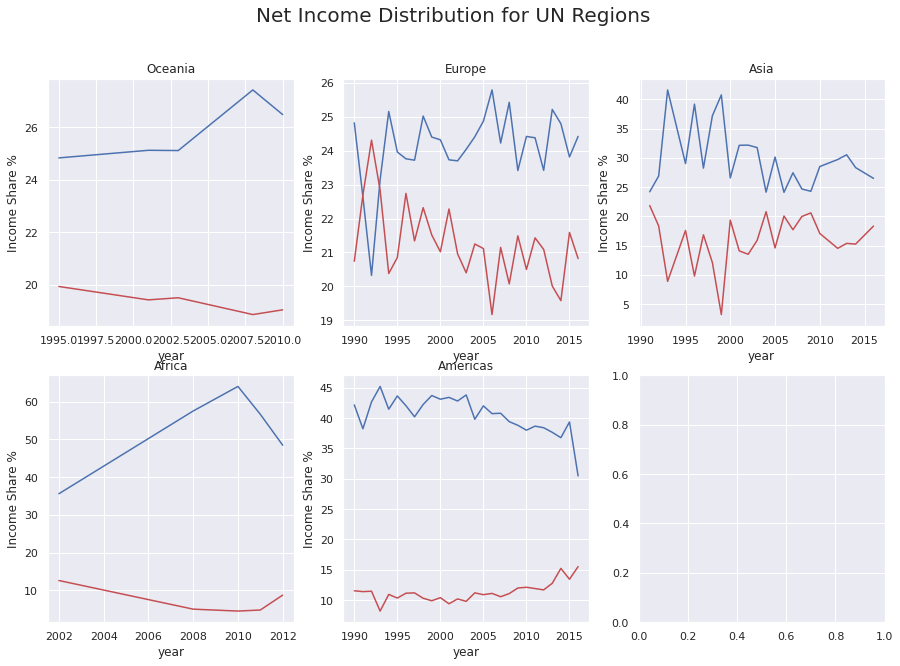

In [13]:
# Plot NetIncome Data
fig, axes = plt.subplots(2,3,figsize=(15,10))
plt.suptitle('Net Income Distribution for UN Regions', fontsize='20')
# Oceania
ni_grouped_oceania = ni_grouped[(ni_grouped['region_un']=='Oceania')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_oceania, ax=axes[0,0])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_oceania, ax=axes[0,0], color='r')
axes[0,0].set_title ("Oceania"); axes[0,0].set_ylabel('Income Share %')
# Europe
ni_grouped_europe = ni_grouped[(ni_grouped['region_un']=='Europe')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_europe, ax=axes[0,1])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_europe, ax=axes[0,1], color='r')
axes[0,1].set_title ("Europe"); axes[0,1].set_ylabel('Income Share %')
# Asia
ni_grouped_asia = ni_grouped[(ni_grouped['region_un']=='Asia')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_asia, ax=axes[0,2])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_asia, ax=axes[0,2], color='r')
axes[0,2].set_title ("Asia"); axes[0,2].set_ylabel('Income Share %')
# Africa
ni_grouped_africa = ni_grouped[(ni_grouped['region_un']=='Africa')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_africa, ax=axes[1,0])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_africa, ax=axes[1,0], color='r')
axes[1,0].set_title ("Africa"); axes[1,0].set_ylabel('Income Share %')
#North America
ni_grouped_americas = ni_grouped[(ni_grouped['region_un']=='Americas')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_americas, ax=axes[1,1])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_americas, ax=axes[1,1], color='r')
axes[1,1].set_title ("Americas"); axes[1,1].set_ylabel('Income Share %')

## Gross Income

Text(0, 0.5, 'Income Share %')

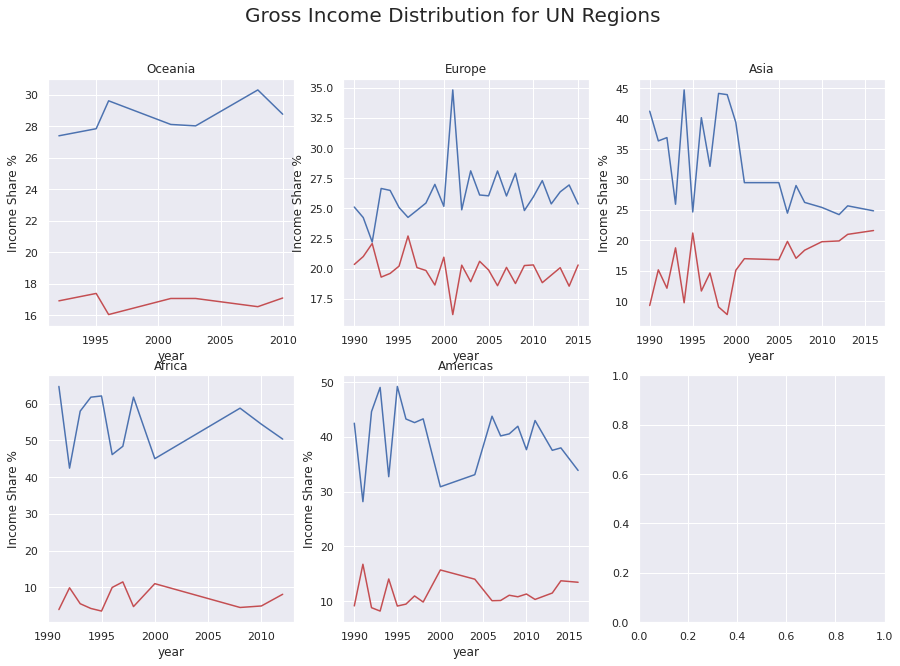

In [14]:
#Gross Income Data
fig, axes = plt.subplots(2,3,figsize=(15,10))
plt.suptitle('Gross Income Distribution for UN Regions', fontsize='20')
# Oceania
gi_grouped_oceania = gi_grouped[(gi_grouped['region_un']=='Oceania')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_oceania, ax=axes[0,0])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_oceania, ax=axes[0,0], color='r')
axes[0,0].set_title ("Oceania"); axes[0,0].set_ylabel('Income Share %')
# Europe
gi_grouped_europe = gi_grouped[(gi_grouped['region_un']=='Europe')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_europe, ax=axes[0,1])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_europe, ax=axes[0,1], color='r')
axes[0,1].set_title ("Europe"); axes[0,1].set_ylabel('Income Share %')
# Asia
gi_grouped_asia = gi_grouped[(gi_grouped['region_un']=='Asia')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_asia, ax=axes[0,2])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_asia, ax=axes[0,2], color='r')
axes[0,2].set_title ("Asia"); axes[0,2].set_ylabel('Income Share %')
# Africa
gi_grouped_africa = gi_grouped[(gi_grouped['region_un']=='Africa')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_africa, ax=axes[1,0])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_africa, ax=axes[1,0], color='r')
axes[1,0].set_title ("Africa"); axes[1,0].set_ylabel('Income Share %')
#North America
gi_grouped_americas = gi_grouped[(gi_grouped['region_un']=='Americas')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_americas, ax=axes[1,1])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_americas, ax=axes[1,1], color='r')
axes[1,1].set_title ("Americas"); axes[1,1].set_ylabel('Income Share %')

# Regional Comaprison of Top 10 %

Text(0, 0.5, 'National Income share of Top 10%')

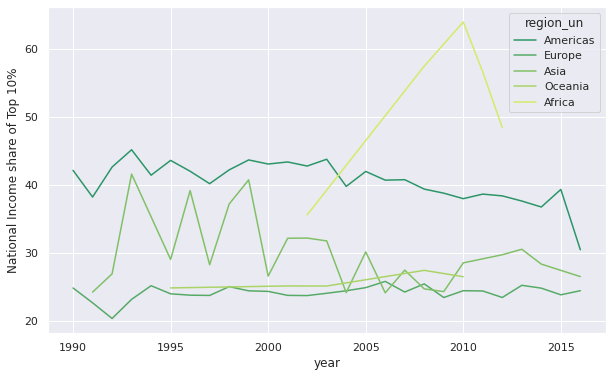

In [15]:
plt.figure(figsize=(10, 6))
g = sns.lineplot(x='year',y='Top 10', data=ni_grouped, hue='region_un', palette='summer')
g.set_ylabel('National Income share of Top 10%')

# Sub Regional Income Distribution

In [16]:
#Sub regions
subregions = data[['region_un','region_un_sub','year']].groupby(['region_un','region_un_sub']).agg('sum')
subregions
#pd.crosstab(data['region_un'],data['region_un_sub'])

year
region_un region_un_sub                    
Africa    Eastern Africa             168241
          Middle Africa               40109
          Northern Africa             54110
          Southern Africa             74200
          Western Africa             158160
Americas  Caribbean                  104143
          Central America            284467
          Northern America           262417
          South America              402863
Asia      Central Asia               126246
          Eastern Asia               176406
          South-eastern Asia         136240
          Southern Asia              106231
          Western Asia               296942
Europe    Eastern Europe             745660
          Northern Europe            753553
          Southern Europe            551472
          Western Europe             599252
Oceania   Australia and New Zealand   48080
          Melanesia                   16060
          Micronesia                   6024
          Polynesia                    8028

In [17]:
ni_grouped_sub = filtered_netIncome[['year','gini_reported','region_un_sub','Top 10','Bottom 40','gdp_ppp_pc_usd2011']].groupby(['year','region_un_sub']).median().reset_index()
gi_grouped_sub = filtered_grossIncome[['year','gini_reported','region_un_sub','Top 10','Bottom 40','gdp_ppp_pc_usd2011']].groupby(['year','region_un_sub']).median().reset_index()


## 1. Oceania
### 1.1. Net Income

Text(0, 0.5, 'Income Share %')

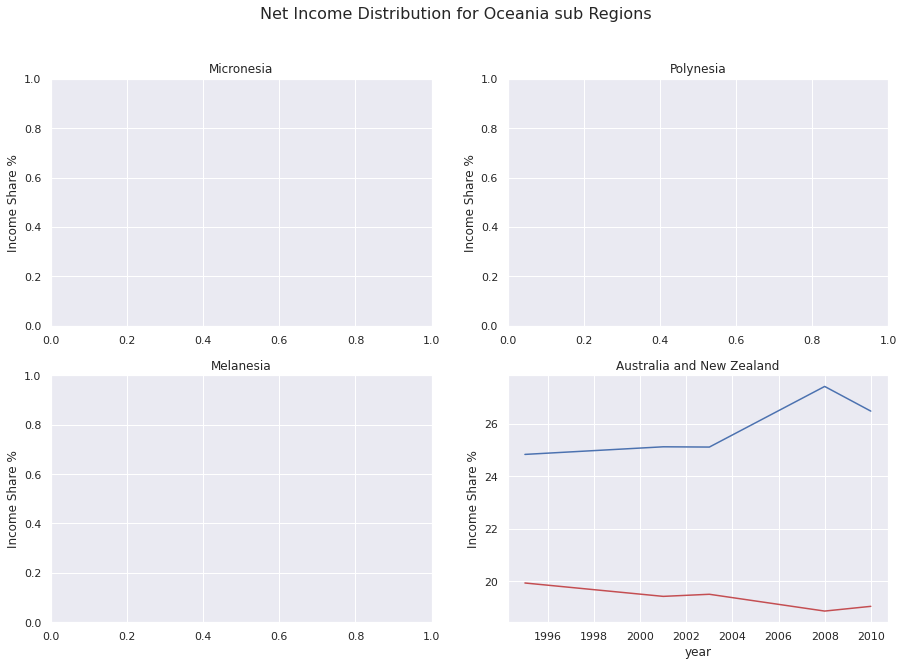

In [18]:
fig, ax1 = plt.subplots(2,2, figsize=(15,10))
plt.suptitle('Net Income Distribution for Oceania sub Regions', fontsize='16')
#Micronesia
ni_grouped_micronesia = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Micronesia')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_micronesia, ax=ax1[0,0])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_micronesia, ax=ax1[0,0], color='r')
ax1[0,0].set_title('Micronesia');ax1[0,0].set_ylabel('Income Share %')
#Polynesia
ni_grouped_polynesia = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Polynesia')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_polynesia, ax=ax1[0,1])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_polynesia, ax=ax1[0,1], color='r')
ax1[0,1].set_title('Polynesia');ax1[0,1].set_ylabel('Income Share %')
#Melanesia
ni_grouped_melanesia = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Melanesia')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_melanesia, ax=ax1[1,0])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_melanesia, ax=ax1[1,0], color='r')
ax1[1,0].set_title('Melanesia');ax1[1,0].set_ylabel('Income Share %')
#Australia and New Zealand
ni_grouped_austNZ = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Australia and New Zealand')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_austNZ, ax=ax1[1,1])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_austNZ, ax=ax1[1,1], color='r')
ax1[1,1].set_title('Australia and New Zealand');ax1[1,1].set_ylabel('Income Share %')

### 1.2. Gross Income

Text(0, 0.5, 'Income Share %')

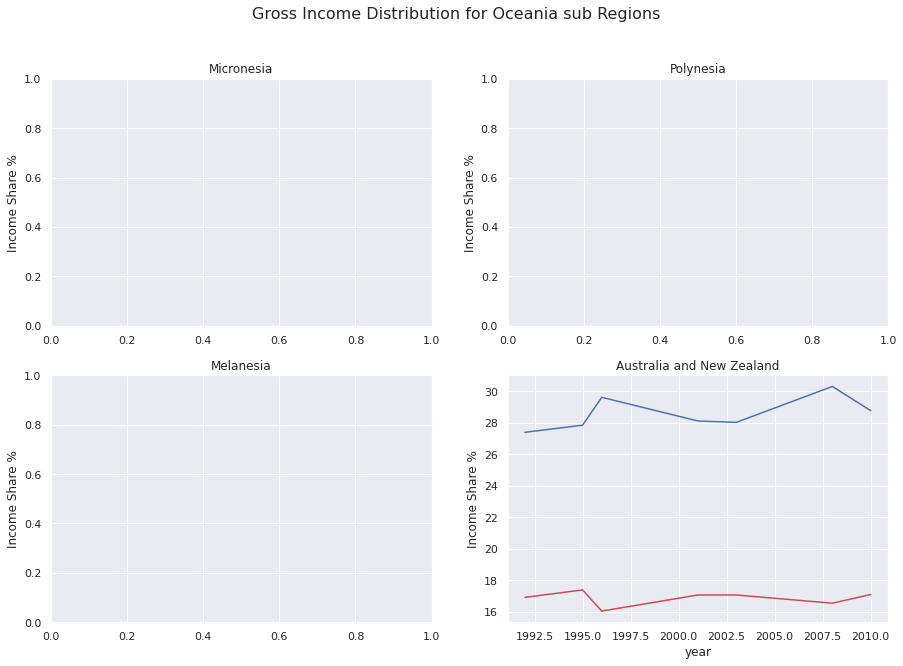

In [19]:
fig, ax1 = plt.subplots(2,2, figsize=(15,10))
plt.suptitle('Gross Income Distribution for Oceania sub Regions', fontsize='16')
#Micronesia
gi_grouped_micronesia = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Micronesia')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_micronesia, ax=ax1[0,0])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_micronesia, ax=ax1[0,0], color='r')
ax1[0,0].set_title('Micronesia');ax1[0,0].set_ylabel('Income Share %')
#Polynesia
gi_grouped_polynesia = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Polynesia')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_polynesia, ax=ax1[0,1])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_polynesia, ax=ax1[0,1], color='r')
ax1[0,1].set_title('Polynesia');ax1[0,1].set_ylabel('Income Share %')
#Melanesia
gi_grouped_melanesia = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Melanesia')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_melanesia, ax=ax1[1,0])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_melanesia, ax=ax1[1,0], color='r')
ax1[1,0].set_title('Melanesia');ax1[1,0].set_ylabel('Income Share %')
#Australia and New Zealand
gi_grouped_austNZ = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Australia and New Zealand')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_austNZ, ax=ax1[1,1])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_austNZ, ax=ax1[1,1], color='r')
ax1[1,1].set_title('Australia and New Zealand');ax1[1,1].set_ylabel('Income Share %')

## 2. Europe
### 2.1. Net Income

Text(0, 0.5, 'Income Share %')

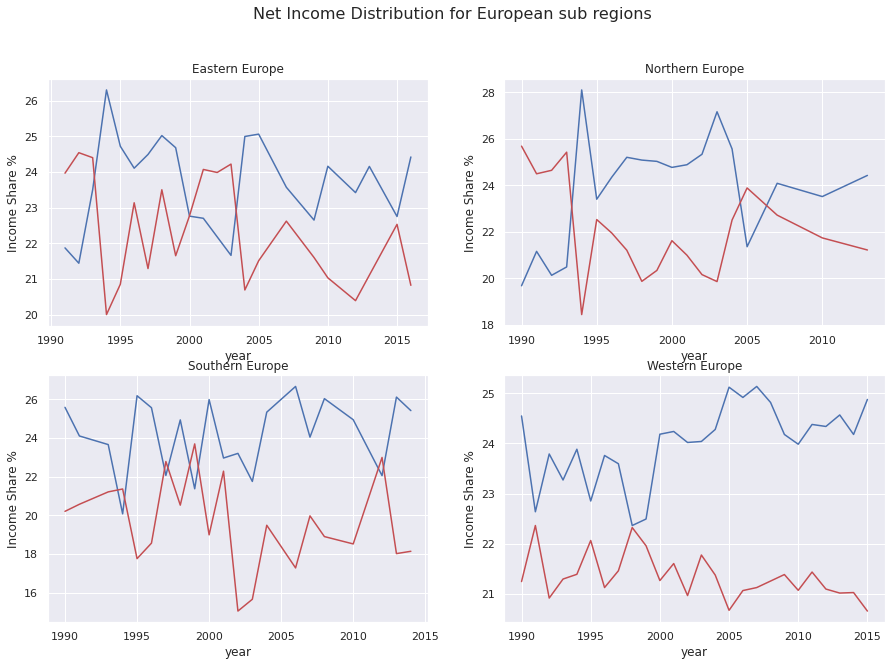

In [20]:
fig, ax1 = plt.subplots(2,2, figsize=(15,10))
plt.suptitle('Net Income Distribution for European sub regions', fontsize='16')
#Eastern Europe
ni_grouped_eastEurope = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Eastern Europe')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_eastEurope, ax=ax1[0,0])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_eastEurope, ax=ax1[0,0], color='r')
ax1[0,0].set_title('Eastern Europe');ax1[0,0].set_ylabel('Income Share %')
#Northern Europe
ni_grouped_northEurope = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Northern Europe')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_northEurope, ax=ax1[0,1])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_northEurope, ax=ax1[0,1], color='r')
ax1[0,1].set_title('Northern Europe');ax1[0,1].set_ylabel('Income Share %')
#Southern Europe
ni_grouped_southEurope = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Southern Europe')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_southEurope, ax=ax1[1,0])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_southEurope, ax=ax1[1,0], color='r')
ax1[1,0].set_title('Southern Europe');ax1[1,0].set_ylabel('Income Share %')
#Western Europe
ni_grouped_westEurope = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Western Europe')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_westEurope, ax=ax1[1,1])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_westEurope, ax=ax1[1,1], color='r')
ax1[1,1].set_title('Western Europe');ax1[1,1].set_ylabel('Income Share %')

### 2.2. Gross Income

Text(0, 0.5, 'Income Share %')

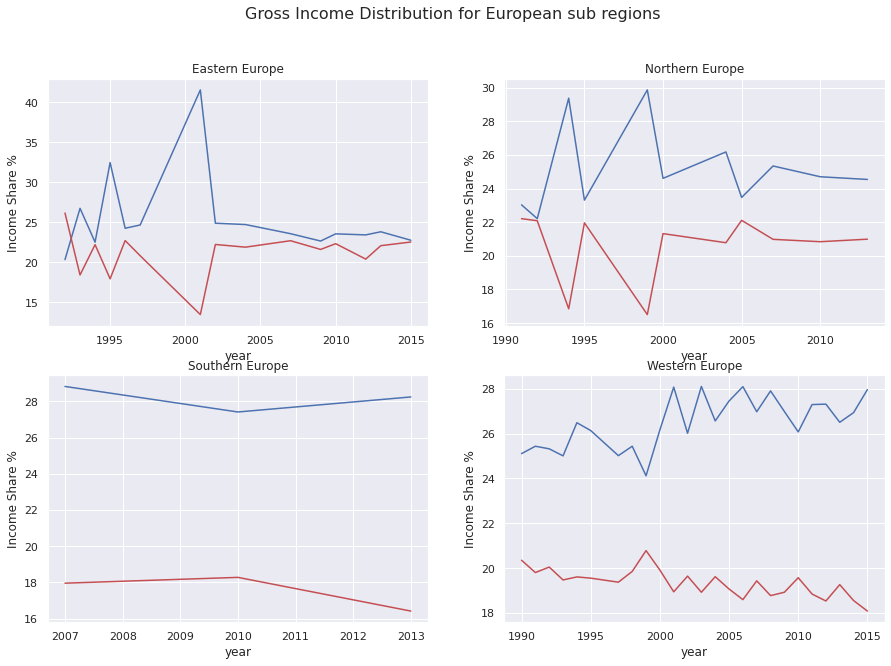

In [21]:
fig, ax1 = plt.subplots(2,2, figsize=(15,10))
plt.suptitle('Gross Income Distribution for European sub regions', fontsize='16')
#Eastern Europe
gi_grouped_eastEurope = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Eastern Europe')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_eastEurope, ax=ax1[0,0])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_eastEurope, ax=ax1[0,0], color='r')
ax1[0,0].set_title('Eastern Europe');ax1[0,0].set_ylabel('Income Share %')
#Northern Europe
gi_grouped_northEurope = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Northern Europe')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_northEurope, ax=ax1[0,1])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_northEurope, ax=ax1[0,1], color='r')
ax1[0,1].set_title('Northern Europe');ax1[0,1].set_ylabel('Income Share %')
#Southern Europe
gi_grouped_southEurope = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Southern Europe')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_southEurope, ax=ax1[1,0])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_southEurope, ax=ax1[1,0], color='r')
ax1[1,0].set_title('Southern Europe');ax1[1,0].set_ylabel('Income Share %')
#Western Europe
gi_grouped_westEurope = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Western Europe')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_westEurope, ax=ax1[1,1])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_westEurope, ax=ax1[1,1], color='r')
ax1[1,1].set_title('Western Europe');ax1[1,1].set_ylabel('Income Share %')

## 3. Sub Regions of Asia

In [22]:
# test data points
ni_grouped_asia = filtered_netIncome[(filtered_netIncome['region_un']=='Asia')][['year','region_un_sub']].groupby(['region_un_sub']).agg('count')                               
ni_grouped_asia

,year
region_un_sub,
Central Asia,11
Eastern Asia,19
Southern Asia,2
Western Asia,16


### 3.1. Net Income

Text(0, 0.5, 'Income Share %')

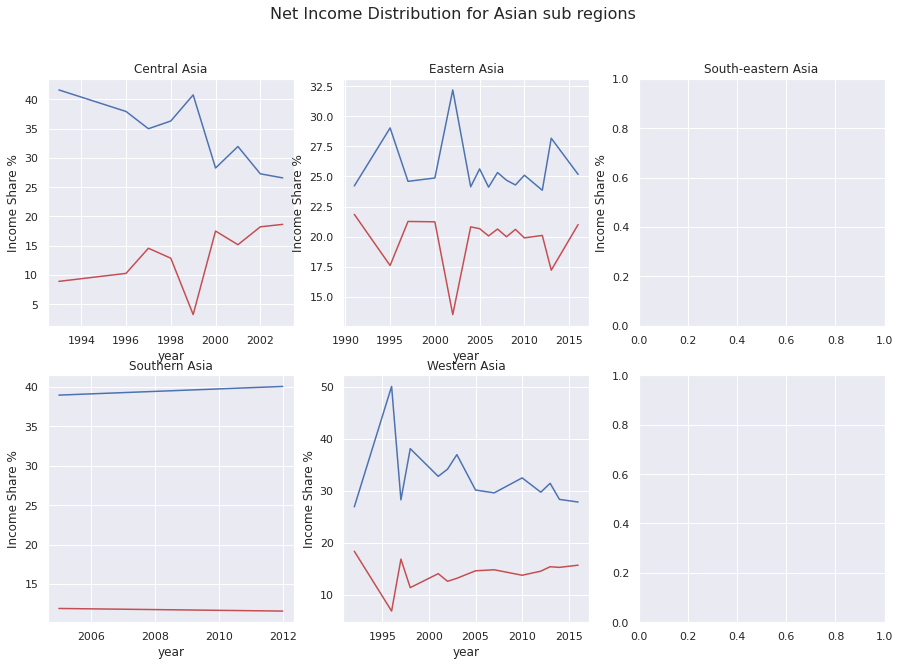

In [23]:
fig, ax1 = plt.subplots(2,3, figsize=(15,10))
plt.suptitle('Net Income Distribution for Asian sub regions', fontsize='16')
#Central Asia
ni_grouped_centralasia = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Central Asia')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_centralasia, ax=ax1[0,0])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_centralasia, ax=ax1[0,0], color='r')
ax1[0,0].set_title('Central Asia');ax1[0,0].set_ylabel('Income Share %')
#Eastern Asia
ni_grouped_eastasia = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Eastern Asia')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_eastasia, ax=ax1[0,1])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_eastasia, ax=ax1[0,1], color='r')
ax1[0,1].set_title('Eastern Asia');ax1[0,1].set_ylabel('Income Share %')
#South-eastern Asia
ni_grouped_southeastasia = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='South-eastern Asia')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_southeastasia, ax=ax1[0,2])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_southeastasia, ax=ax1[0,2], color='r')
ax1[0,2].set_title('South-eastern Asia');ax1[0,2].set_ylabel('Income Share %')
#Southern Asia
ni_grouped_southasia = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Southern Asia')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_southasia, ax=ax1[1,0])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_southasia, ax=ax1[1,0], color='r')
ax1[1,0].set_title('Southern Asia');ax1[1,0].set_ylabel('Income Share %')
##Western Asia
ni_grouped_westasia = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Western Asia')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_westasia, ax=ax1[1,1])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_westasia, ax=ax1[1,1], color='r')
ax1[1,1].set_title('Western Asia');ax1[1,1].set_ylabel('Income Share %')

### 3.2. Gross Income

Text(0, 0.5, 'Income Share %')

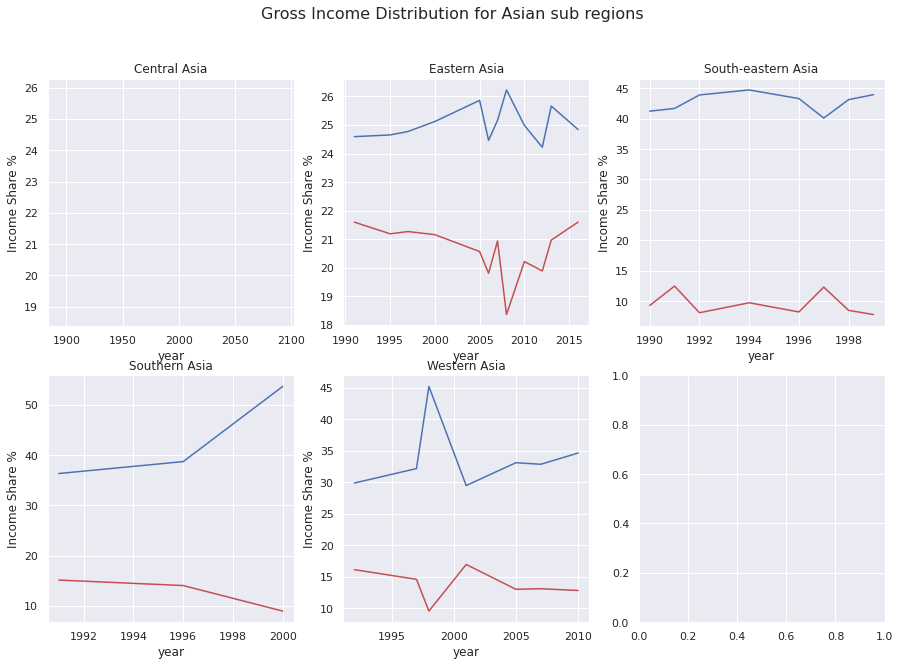

In [24]:
fig, ax1 = plt.subplots(2,3, figsize=(15,10))
plt.suptitle('Gross Income Distribution for Asian sub regions', fontsize='16')
#Central Asia
gi_grouped_centralasia = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Central Asia')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_centralasia, ax=ax1[0,0])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_centralasia, ax=ax1[0,0], color='r')
ax1[0,0].set_title('Central Asia');ax1[0,0].set_ylabel('Income Share %')
#Eastern Asia
gi_grouped_eastasia = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Eastern Asia')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_eastasia, ax=ax1[0,1])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_eastasia, ax=ax1[0,1], color='r')
ax1[0,1].set_title('Eastern Asia');ax1[0,1].set_ylabel('Income Share %')
#South-eastern Asia
gi_grouped_southeastasia = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='South-eastern Asia')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_southeastasia, ax=ax1[0,2])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_southeastasia, ax=ax1[0,2], color='r')
ax1[0,2].set_title('South-eastern Asia');ax1[0,2].set_ylabel('Income Share %')
#Southern Asia
gi_grouped_southasia = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Southern Asia')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_southasia, ax=ax1[1,0])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_southasia, ax=ax1[1,0], color='r')
ax1[1,0].set_title('Southern Asia');ax1[1,0].set_ylabel('Income Share %')
##Western Asia
gi_grouped_westasia = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Western Asia')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_westasia, ax=ax1[1,1])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_westasia, ax=ax1[1,1], color='r')
ax1[1,1].set_title('Western Asia');ax1[1,1].set_ylabel('Income Share %')

## 4. Sub Regions of Africa

### 4.1. Net Income

In [25]:
# test data points
ni_grouped_africa = filtered_netIncome[(filtered_netIncome['region_un']=='Africa')][['year','region_un_sub']].groupby(['region_un_sub']).agg('count')                               
ni_grouped_africa
#pd.crosstab()

,year
region_un_sub,
Eastern Africa,1
Northern Africa,1
Southern Africa,4


Text(0, 0.5, 'Income Share %')

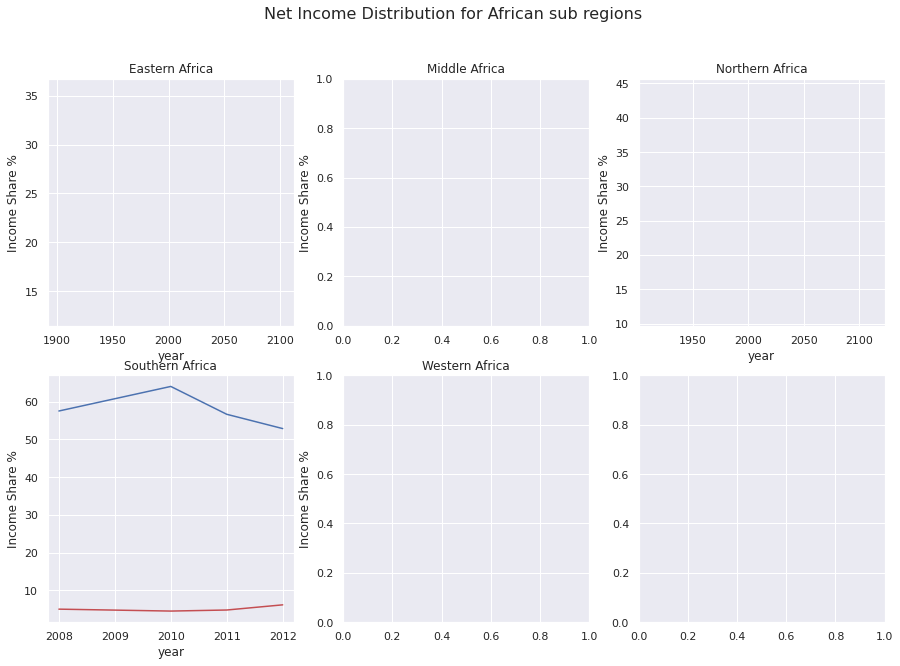

In [26]:
fig, ax1 = plt.subplots(2,3, figsize=(15,10))
plt.suptitle('Net Income Distribution for African sub regions', fontsize='16')
#Eastern Africa
ni_grouped_eastafrica = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Eastern Africa')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_eastafrica, ax=ax1[0,0])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_eastafrica, ax=ax1[0,0], color='r')
ax1[0,0].set_title('Eastern Africa');ax1[0,0].set_ylabel('Income Share %')
#Middle Africa
ni_grouped_midafrica = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Middle Africa')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_midafrica, ax=ax1[0,1])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_midafrica, ax=ax1[0,1], color='r')
ax1[0,1].set_title('Middle Africa');ax1[0,1].set_ylabel('Income Share %')
#Northern Africa
ni_grouped_northafrica = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Northern Africa')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_northafrica, ax=ax1[0,2])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_northafrica, ax=ax1[0,2], color='r')
ax1[0,2].set_title('Northern Africa');ax1[0,2].set_ylabel('Income Share %')
#Southern Africa
ni_grouped_southafrica = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Southern Africa')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_southafrica, ax=ax1[1,0])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_southafrica, ax=ax1[1,0], color='r')
ax1[1,0].set_title('Southern Africa');ax1[1,0].set_ylabel('Income Share %')
##Western Africa
ni_grouped_westafrica = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Western Africa')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_westafrica, ax=ax1[1,1])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_westafrica, ax=ax1[1,1], color='r')
ax1[1,1].set_title('Western Africa');ax1[1,1].set_ylabel('Income Share %')

### 4.2. Gross Income

In [27]:
gi_grouped_africa = filtered_grossIncome[(filtered_grossIncome['region_un']=='Africa')][['year','region_un_sub']].groupby(['region_un_sub']).agg('count')                               
gi_grouped_africa

,year
region_un_sub,
Eastern Africa,10
Middle Africa,1
Northern Africa,1
Southern Africa,5
Western Africa,10


Text(0, 0.5, 'Income Share %')

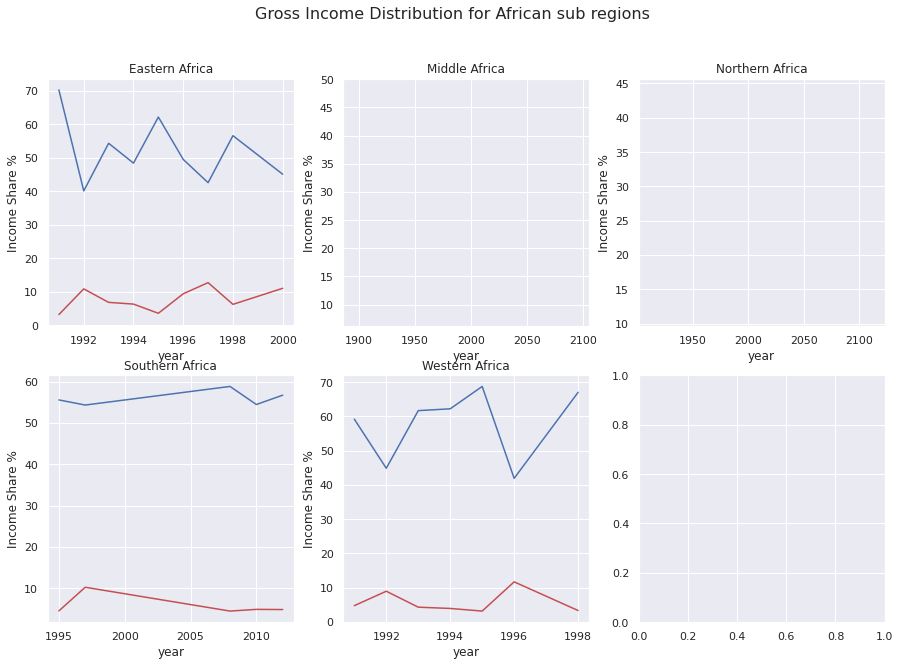

In [28]:
fig, ax1 = plt.subplots(2,3, figsize=(15,10))
plt.suptitle('Gross Income Distribution for African sub regions', fontsize='16')
#Eastern Africa
gi_grouped_eastafrica = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Eastern Africa')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_eastafrica, ax=ax1[0,0])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_eastafrica, ax=ax1[0,0], color='r')
ax1[0,0].set_title('Eastern Africa');ax1[0,0].set_ylabel('Income Share %')
#Middle Africa
gi_grouped_midafrica = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Middle Africa')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_midafrica, ax=ax1[0,1])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_midafrica, ax=ax1[0,1], color='r')
ax1[0,1].set_title('Middle Africa');ax1[0,1].set_ylabel('Income Share %')
#Northern Africa
gi_grouped_northafrica = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Northern Africa')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_northafrica, ax=ax1[0,2])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_northafrica, ax=ax1[0,2], color='r')
ax1[0,2].set_title('Northern Africa');ax1[0,2].set_ylabel('Income Share %')
#Southern Africa
gi_grouped_southafrica = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Southern Africa')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_southafrica, ax=ax1[1,0])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_southafrica, ax=ax1[1,0], color='r')
ax1[1,0].set_title('Southern Africa');ax1[1,0].set_ylabel('Income Share %')
##Western Africa
gi_grouped_westafrica = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Western Africa')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_westafrica, ax=ax1[1,1])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_westafrica, ax=ax1[1,1], color='r')
ax1[1,1].set_title('Western Africa');ax1[1,1].set_ylabel('Income Share %')

## 5. Sub Regions of Americas

### 5.1. Net Income

Text(0, 0.5, 'Income Share %')

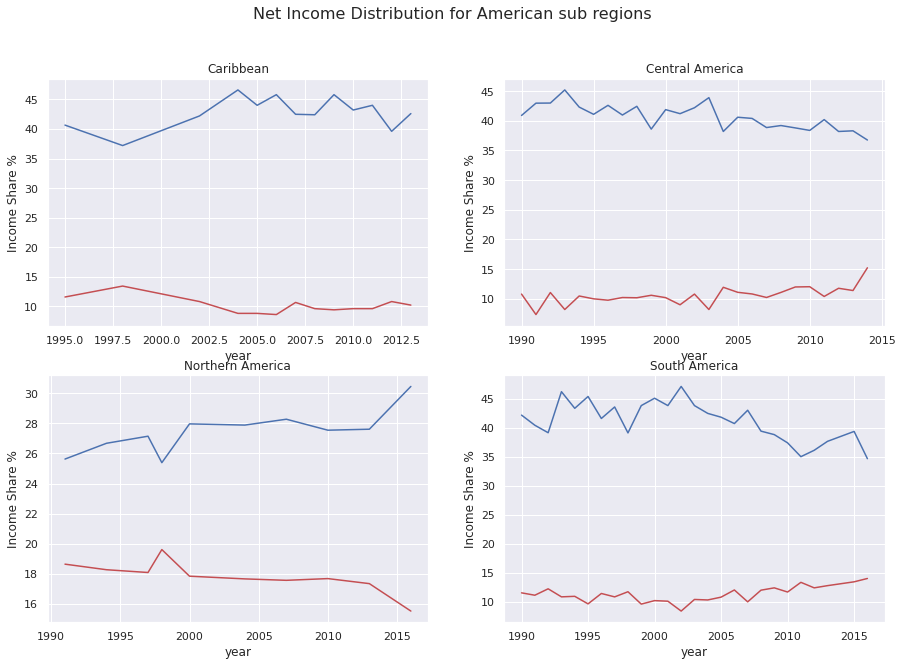

In [29]:
fig, ax1 = plt.subplots(2,2, figsize=(15,10))
plt.suptitle('Net Income Distribution for American sub regions', fontsize='16')
#Caribbean
ni_grouped_caribbean = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Caribbean')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_caribbean, ax=ax1[0,0])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_caribbean, ax=ax1[0,0], color='r')
ax1[0,0].set_title('Caribbean');ax1[0,0].set_ylabel('Income Share %')
#Central America
ni_grouped_centralamerica = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Central America')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_centralamerica, ax=ax1[0,1])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_centralamerica, ax=ax1[0,1], color='r')
ax1[0,1].set_title('Central America');ax1[0,1].set_ylabel('Income Share %')
#Northern America
ni_grouped_northamerica = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Northern America')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_northamerica, ax=ax1[1,0])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_northamerica, ax=ax1[1,0], color='r')
ax1[1,0].set_title('Northern America');ax1[1,0].set_ylabel('Income Share %')
#South America
ni_grouped_southamerica = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='South America')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=ni_grouped_southamerica, ax=ax1[1,1])
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_southamerica, ax=ax1[1,1], color='r')
ax1[1,1].set_title('South America');ax1[1,1].set_ylabel('Income Share %')

### 5.2. Gross Income

Text(0, 0.5, 'Income Share %')

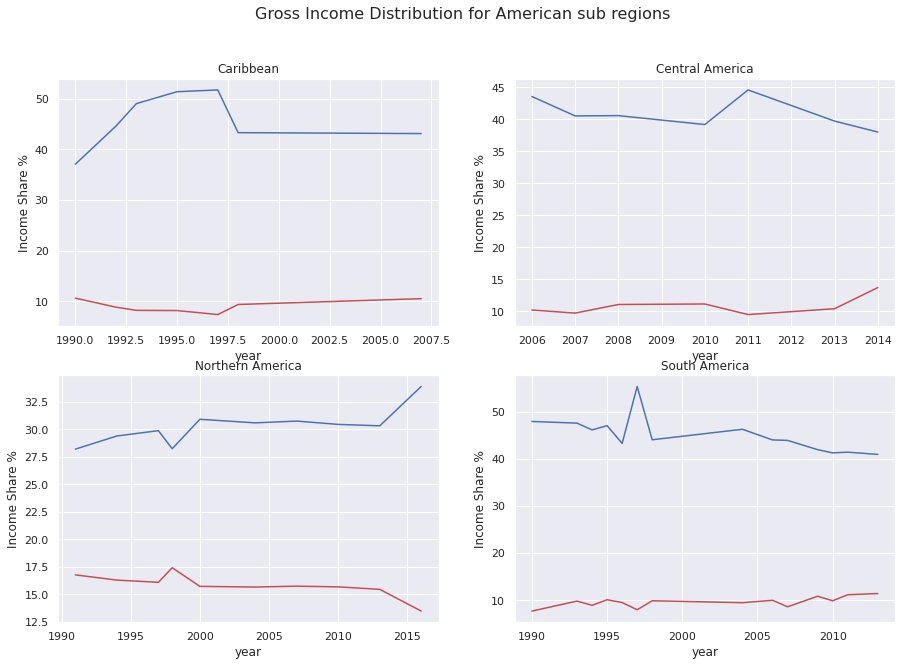

In [30]:
fig, ax1 = plt.subplots(2,2, figsize=(15,10))
plt.suptitle('Gross Income Distribution for American sub regions', fontsize='16')
#Caribbean
gi_grouped_caribbean = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Caribbean')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_caribbean, ax=ax1[0,0])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_caribbean, ax=ax1[0,0], color='r')
ax1[0,0].set_title('Caribbean');ax1[0,0].set_ylabel('Income Share %')
#Central America
gi_grouped_centralamerica = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Central America')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_centralamerica, ax=ax1[0,1])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_centralamerica, ax=ax1[0,1], color='r')
ax1[0,1].set_title('Central America');ax1[0,1].set_ylabel('Income Share %')
#Northern America
gi_grouped_northamerica = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Northern America')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_northamerica, ax=ax1[1,0])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_northamerica, ax=ax1[1,0], color='r')
ax1[1,0].set_title('Northern America');ax1[1,0].set_ylabel('Income Share %')
#South America
gi_grouped_southamerica = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='South America')][['year','Top 10','Bottom 40']]
sns.lineplot(x='year',y='Top 10', data=gi_grouped_southamerica, ax=ax1[1,1])
sns.lineplot(x='year',y='Bottom 40', data=gi_grouped_southamerica, ax=ax1[1,1], color='r')
ax1[1,1].set_title('South America');ax1[1,1].set_ylabel('Income Share %')

# Random Analysis

## Gross Income

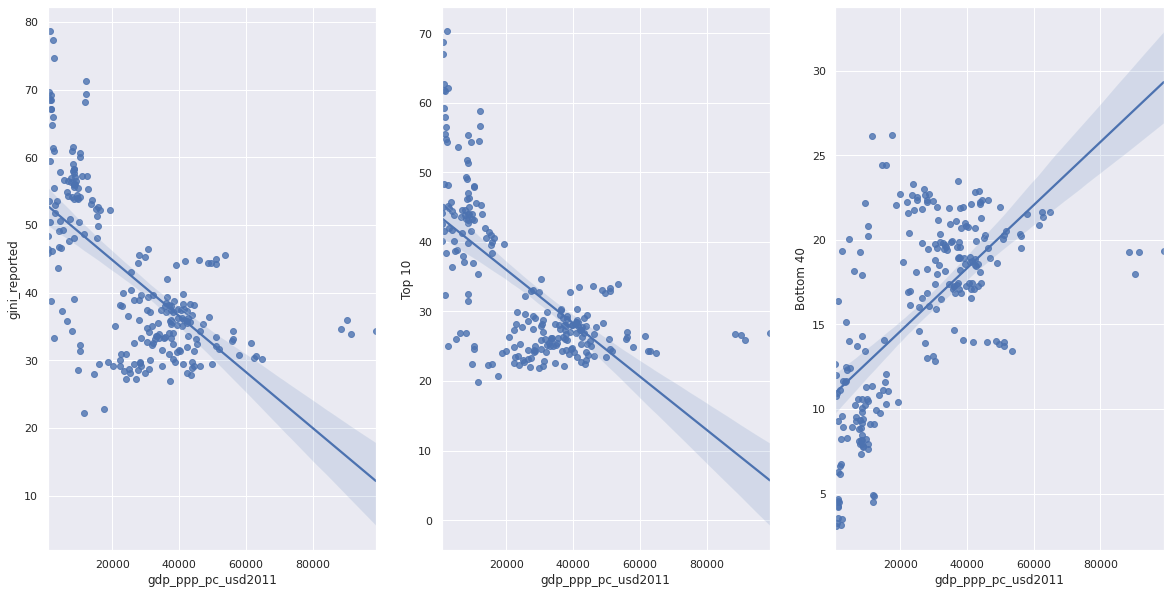

In [31]:
# relationship with GDP
fig, axes = plt.subplots(1,3, figsize=(20,10))

sns.regplot(x=filtered_grossIncome["gdp_ppp_pc_usd2011"], y=filtered_grossIncome["gini_reported"], ax=axes[0])
sns.regplot(x=filtered_grossIncome["gdp_ppp_pc_usd2011"], y=filtered_grossIncome["Top 10"], ax=axes[1])
sns.regplot(x=filtered_grossIncome["gdp_ppp_pc_usd2011"], y=filtered_grossIncome["Bottom 40"], ax=axes[2])

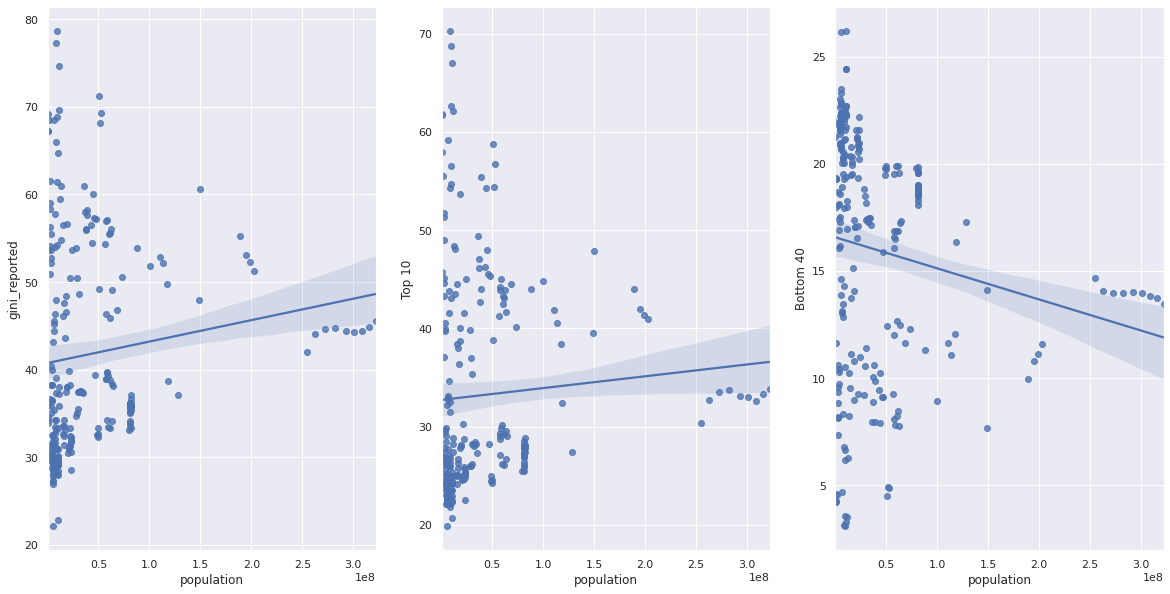

In [32]:
# relationship with population
fig, axes = plt.subplots(1,3, figsize=(20,10))

sns.regplot(x=filtered_grossIncome["population"], y=filtered_grossIncome["gini_reported"], ax=axes[0])
sns.regplot(x=filtered_grossIncome["population"], y=filtered_grossIncome["Top 10"], ax=axes[1])
sns.regplot(x=filtered_grossIncome["population"], y=filtered_grossIncome["Bottom 40"], ax=axes[2])

## Net Income

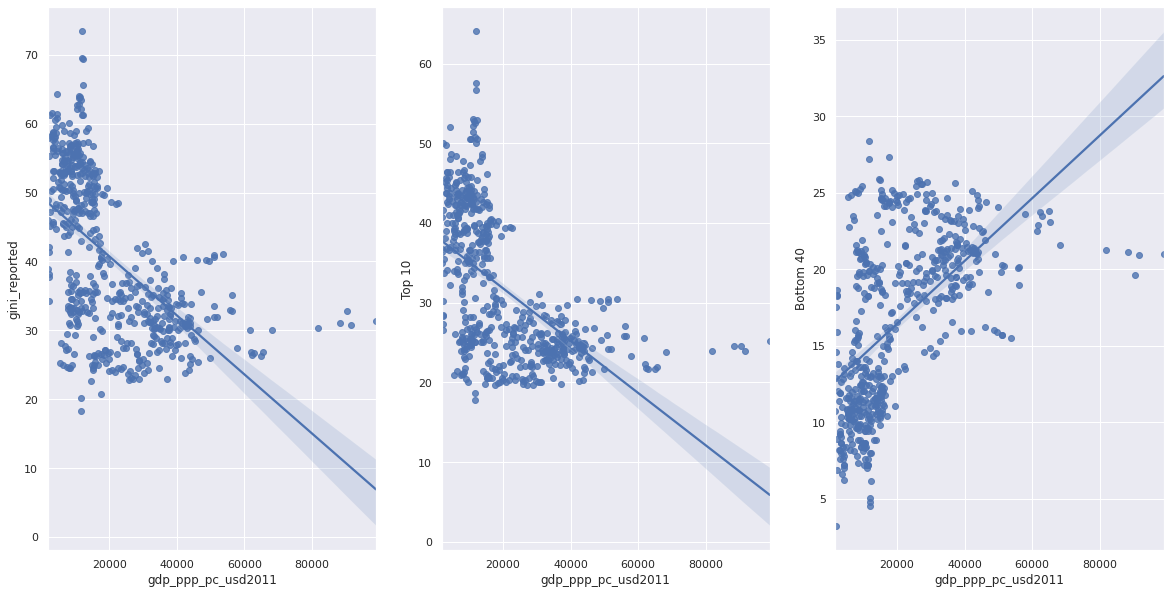

In [33]:
# relationship with GDP
fig, axes = plt.subplots(1,3, figsize=(20,10))

sns.regplot(x=filtered_netIncome["gdp_ppp_pc_usd2011"], y=filtered_netIncome["gini_reported"], ax=axes[0])
sns.regplot(x=filtered_netIncome["gdp_ppp_pc_usd2011"], y=filtered_netIncome["Top 10"], ax=axes[1])
sns.regplot(x=filtered_netIncome["gdp_ppp_pc_usd2011"], y=filtered_netIncome["Bottom 40"], ax=axes[2])

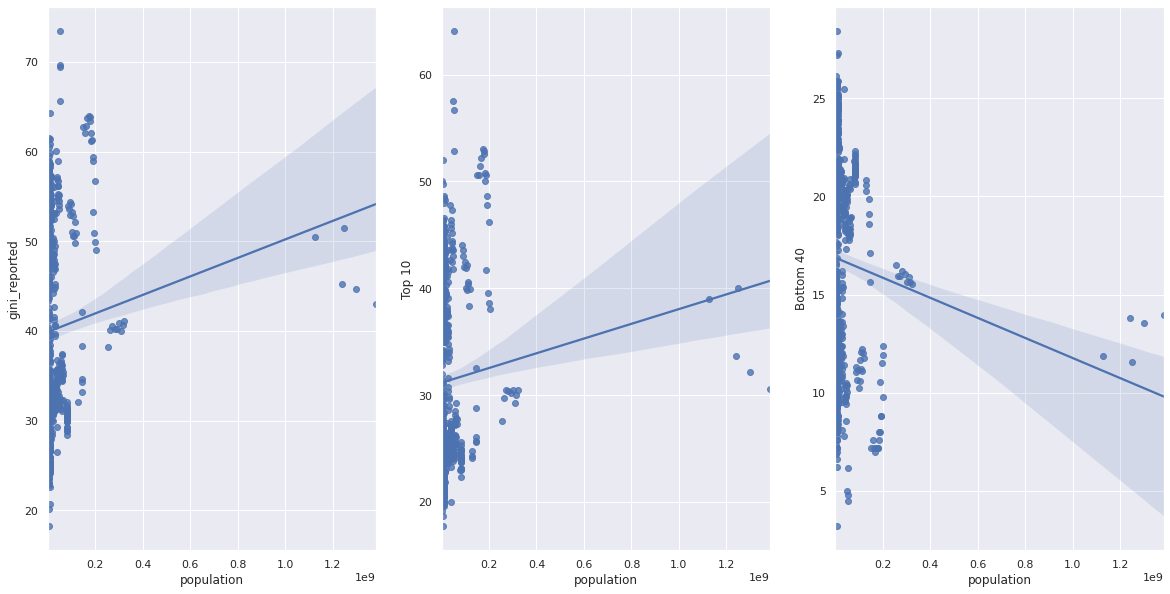

In [34]:
# relationship with population
fig, axes = plt.subplots(1,3, figsize=(20,10))

sns.regplot(x=filtered_netIncome["population"], y=filtered_netIncome["gini_reported"], ax=axes[0])
sns.regplot(x=filtered_netIncome["population"], y=filtered_netIncome["Top 10"], ax=axes[1])
sns.regplot(x=filtered_netIncome["population"], y=filtered_netIncome["Bottom 40"], ax=axes[2])

## Consumption

In [35]:
filtered_comsumption_pc = data[(data['resource'] == 'Consumption') & (data['scale']== 'Per capita')]
filtered_comsumption_pc.shape

(765, 58)

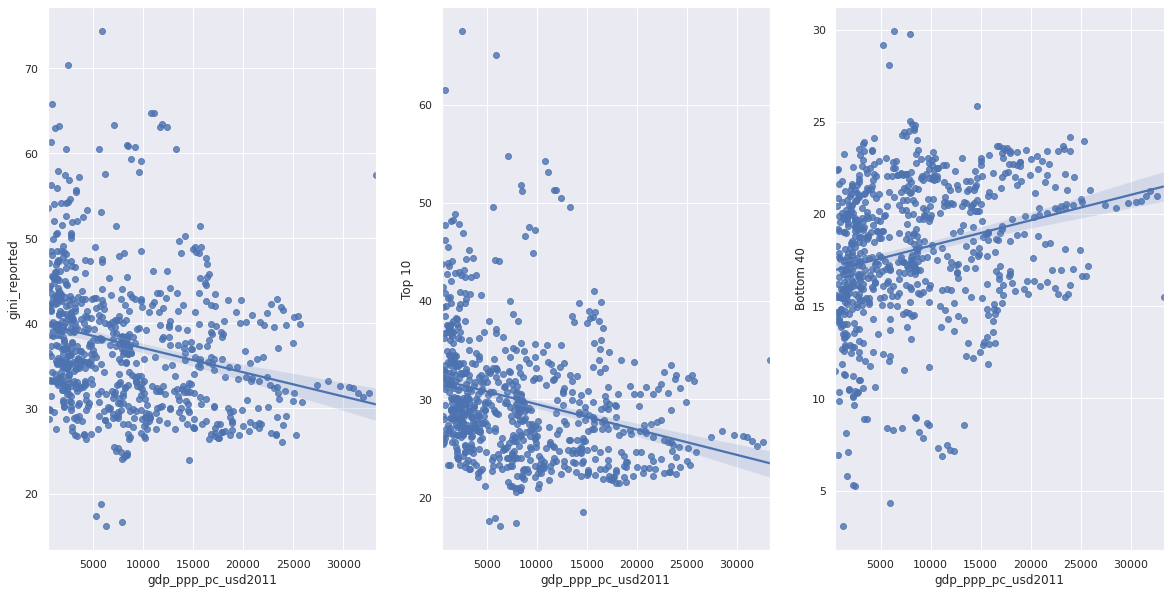

In [36]:
# relationship with GDP
fig, axes = plt.subplots(1,3, figsize=(20,10))

sns.regplot(x=filtered_comsumption_pc["gdp_ppp_pc_usd2011"], y=filtered_comsumption_pc["gini_reported"], ax=axes[0])
sns.regplot(x=filtered_comsumption_pc["gdp_ppp_pc_usd2011"], y=filtered_comsumption_pc["Top 10"], ax=axes[1])
sns.regplot(x=filtered_comsumption_pc["gdp_ppp_pc_usd2011"], y=filtered_comsumption_pc["Bottom 40"], ax=axes[2])

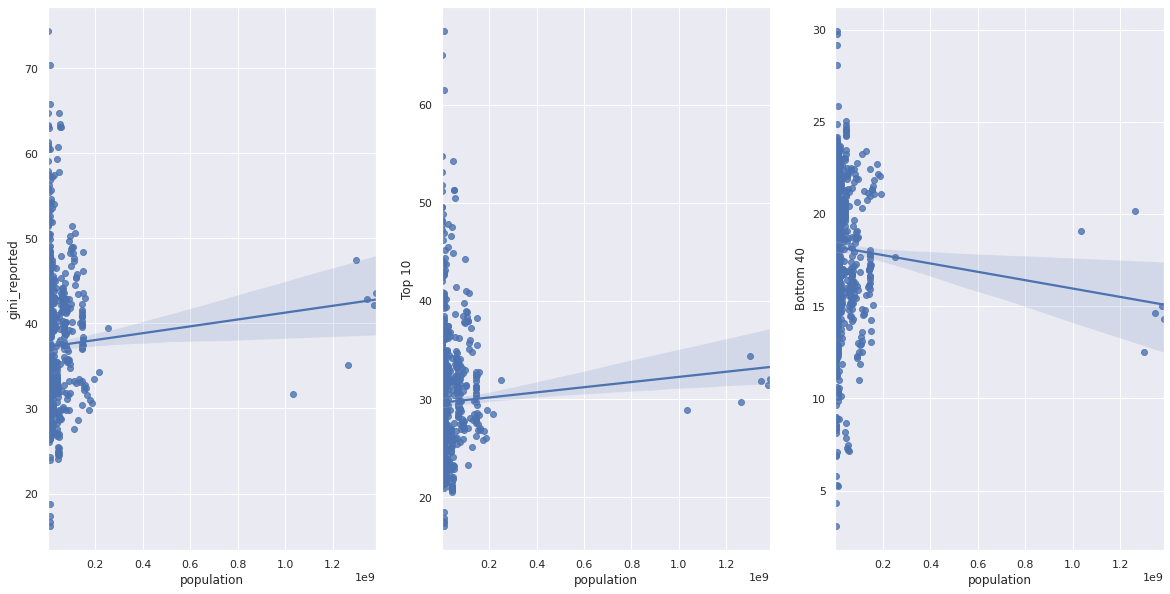

In [37]:
# relationship with population
fig, axes = plt.subplots(1,3, figsize=(20,10))

sns.regplot(x=filtered_comsumption_pc["population"], y=filtered_comsumption_pc["gini_reported"], ax=axes[0])
sns.regplot(x=filtered_comsumption_pc["population"], y=filtered_comsumption_pc["Top 10"], ax=axes[1])
sns.regplot(x=filtered_comsumption_pc["population"], y=filtered_comsumption_pc["Bottom 40"], ax=axes[2])

In [38]:
filtered_comsumption_eq = data[(data['resource'] == 'Consumption') & (data['scale']== 'Equivalized')]
filtered_comsumption_eq.shape

(15, 58)

# General Overview

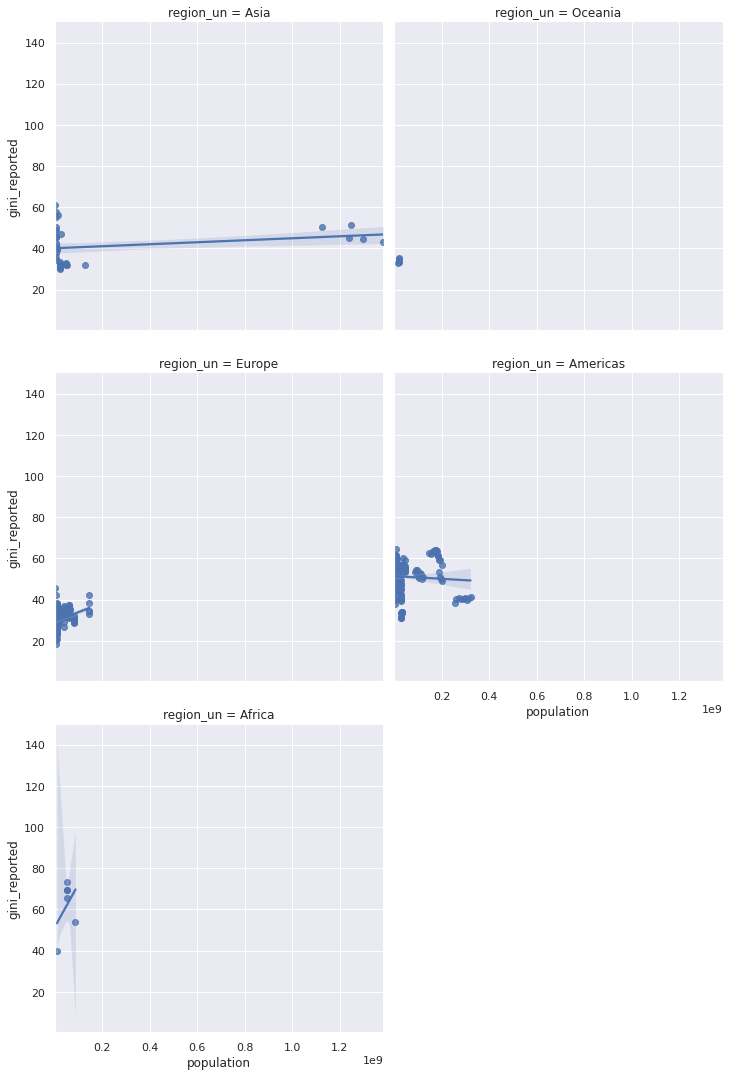

In [39]:
# relationship with population
sns.lmplot(data=filtered_netIncome, x='population', y='gini_reported', col='region_un', col_wrap=2)


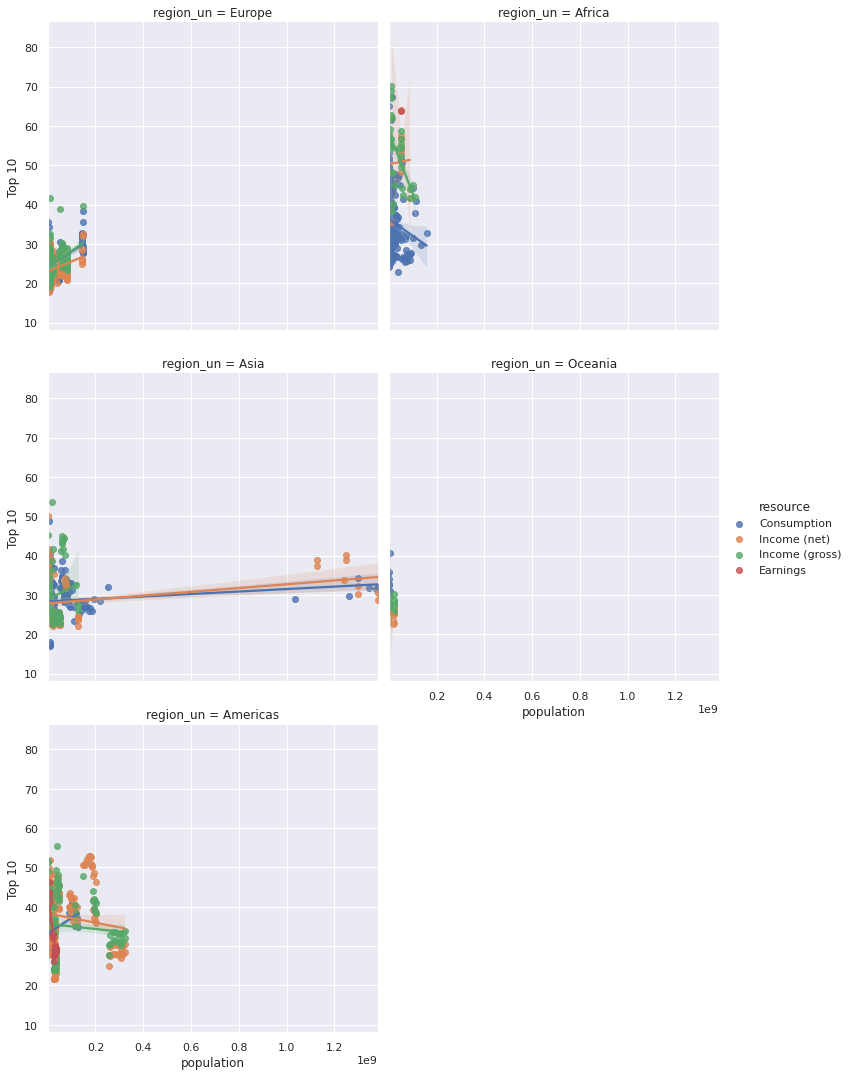

In [40]:
sns.lmplot(data=data, x="population", y="Top 10", col='region_un', hue='resource', col_wrap=2)

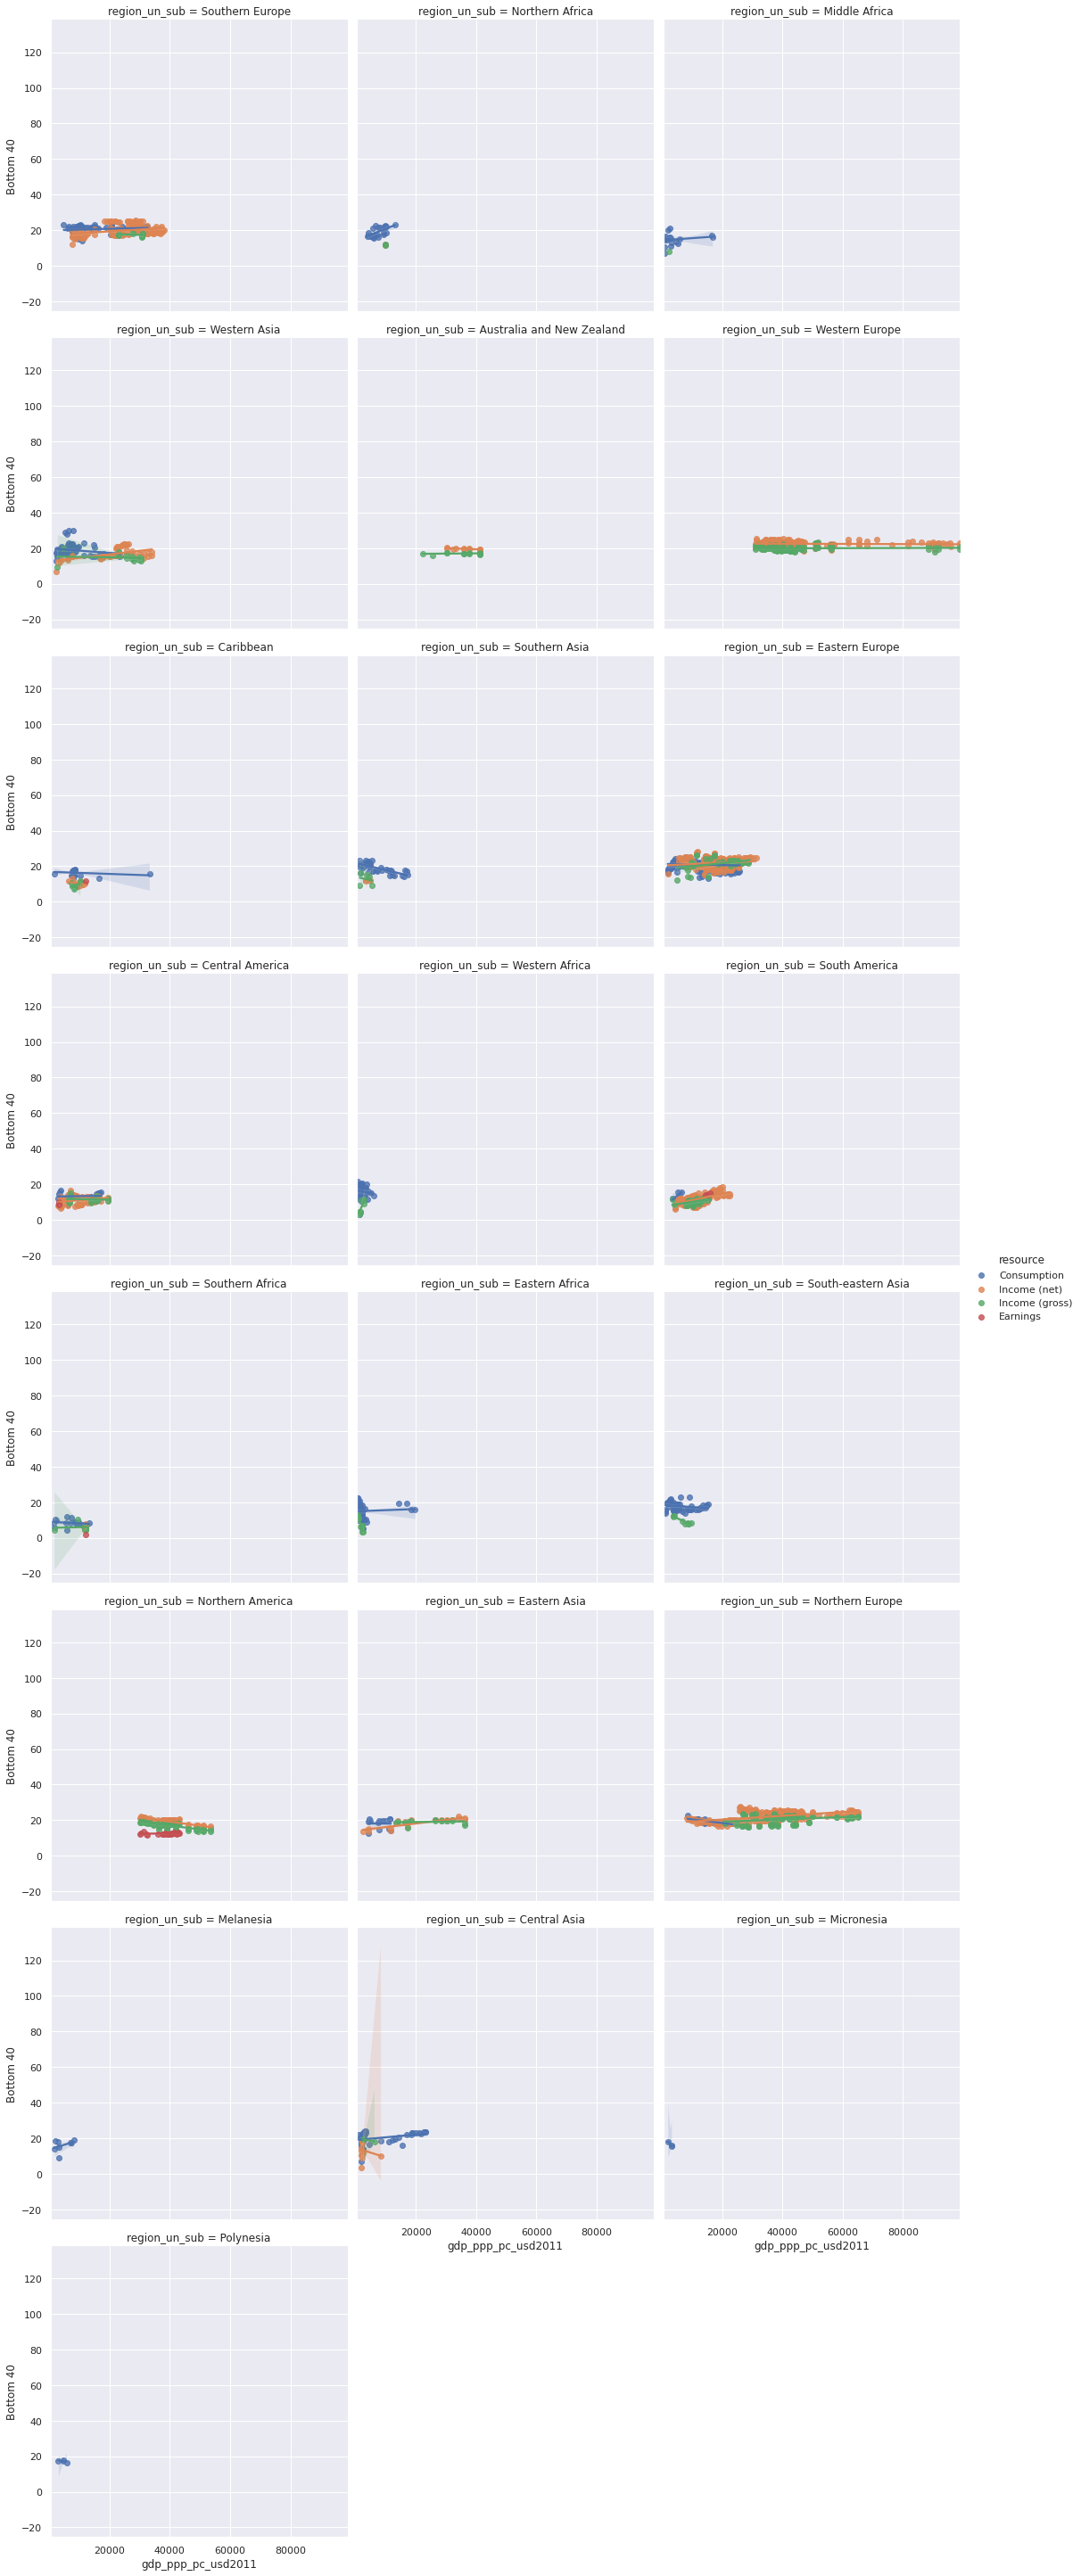

In [41]:
sns.lmplot(data=data, x="gdp_ppp_pc_usd2011", y="Bottom 40", col='region_un_sub', hue='resource', col_wrap=3)

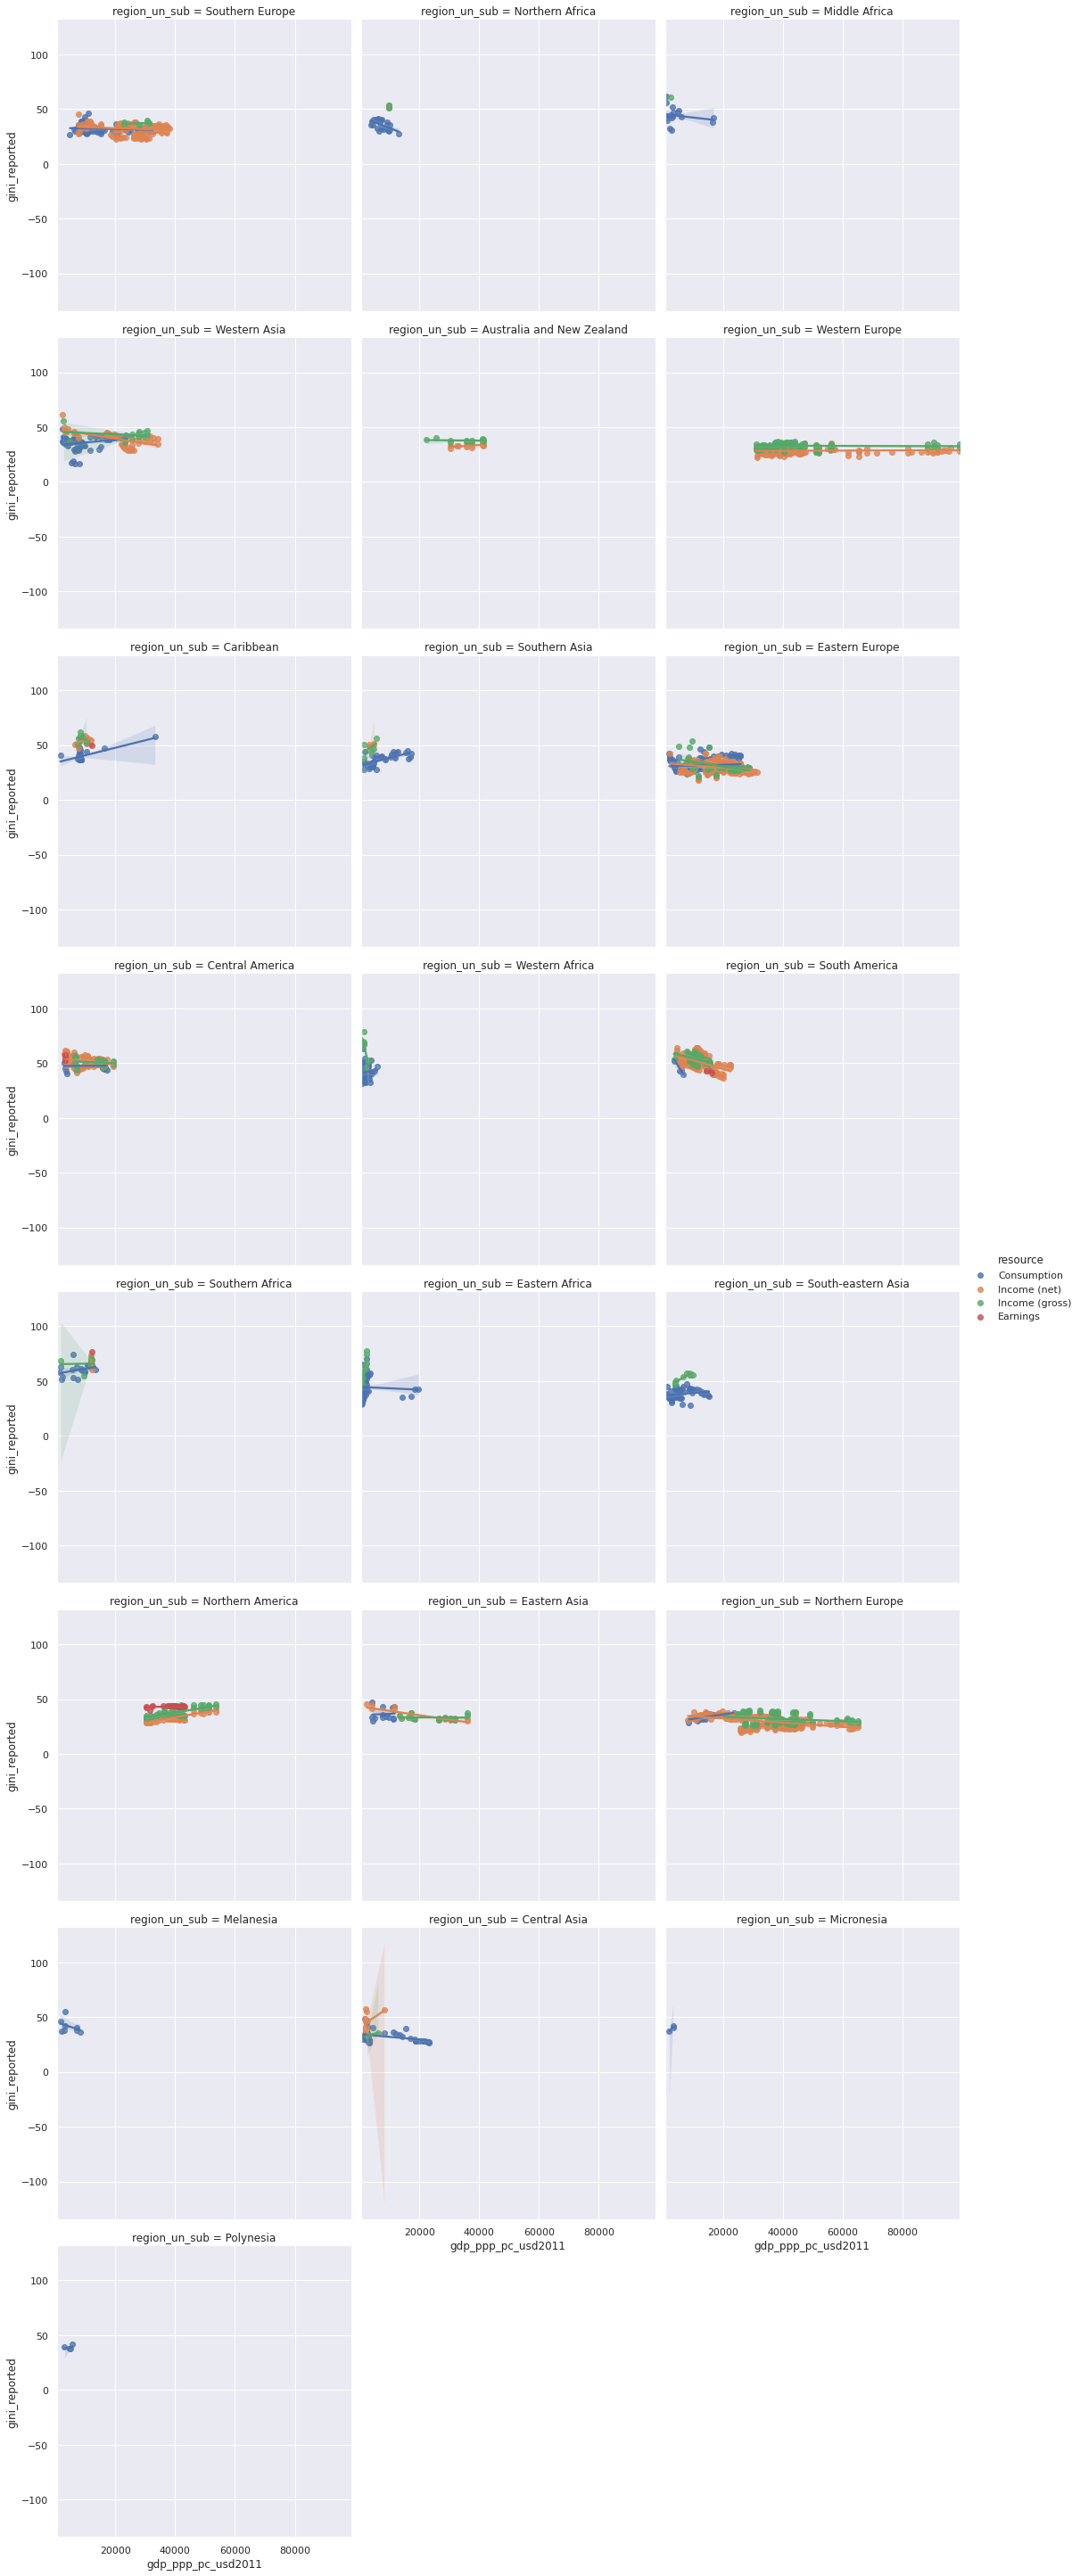

In [42]:
sns.lmplot(data=data, x="gdp_ppp_pc_usd2011", y="gini_reported", col='region_un_sub', hue='resource', col_wrap=3)

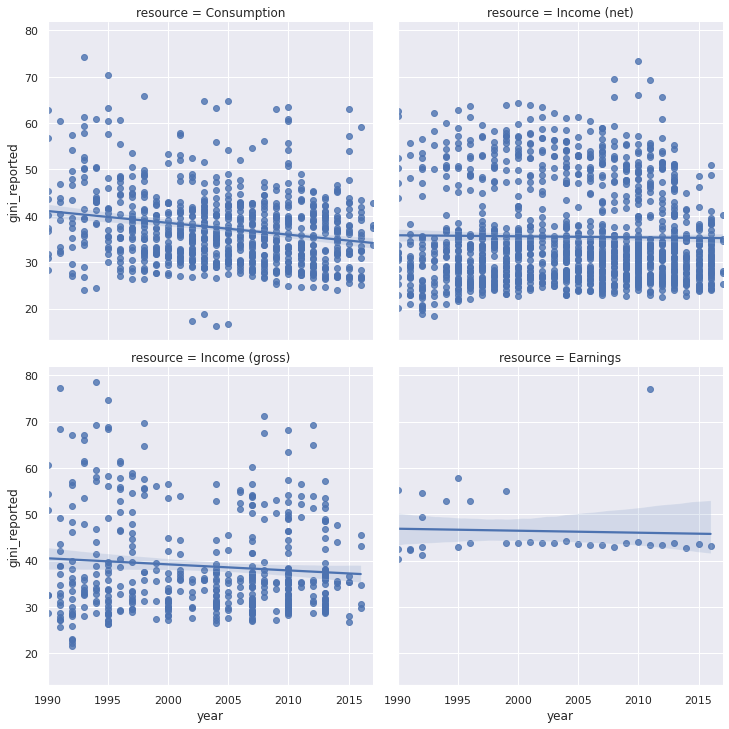

In [43]:
sns.lmplot(data=data, x="year", y="gini_reported", col='resource', col_wrap=2)

# Income inequality over time in UN Regions

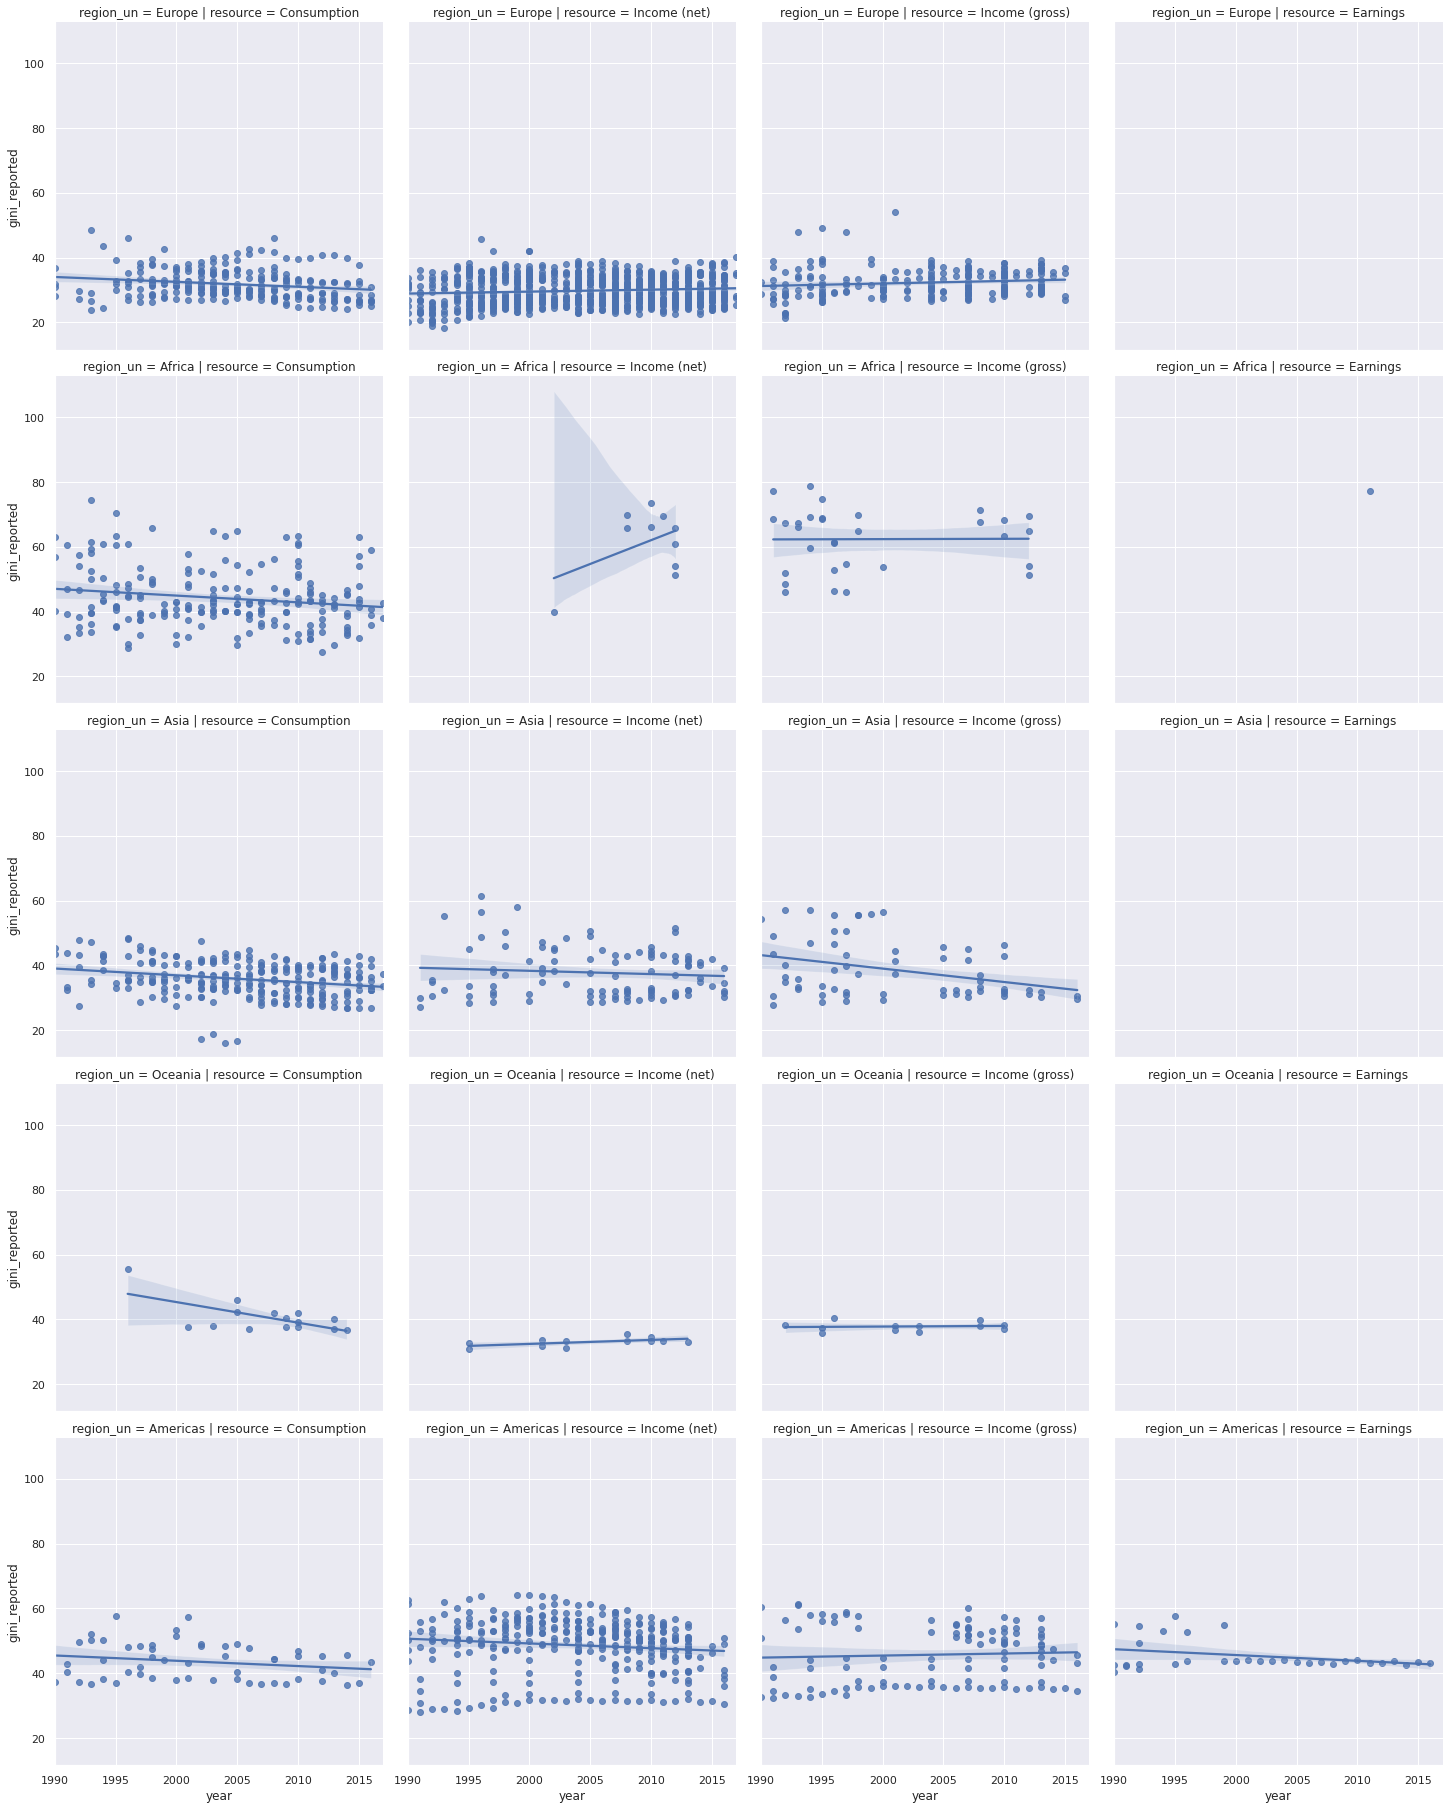

In [44]:
sns.lmplot(data=data, x="year", y="gini_reported", col='resource', row='region_un')

# Income inequality over time in Wolrd Bank Regions

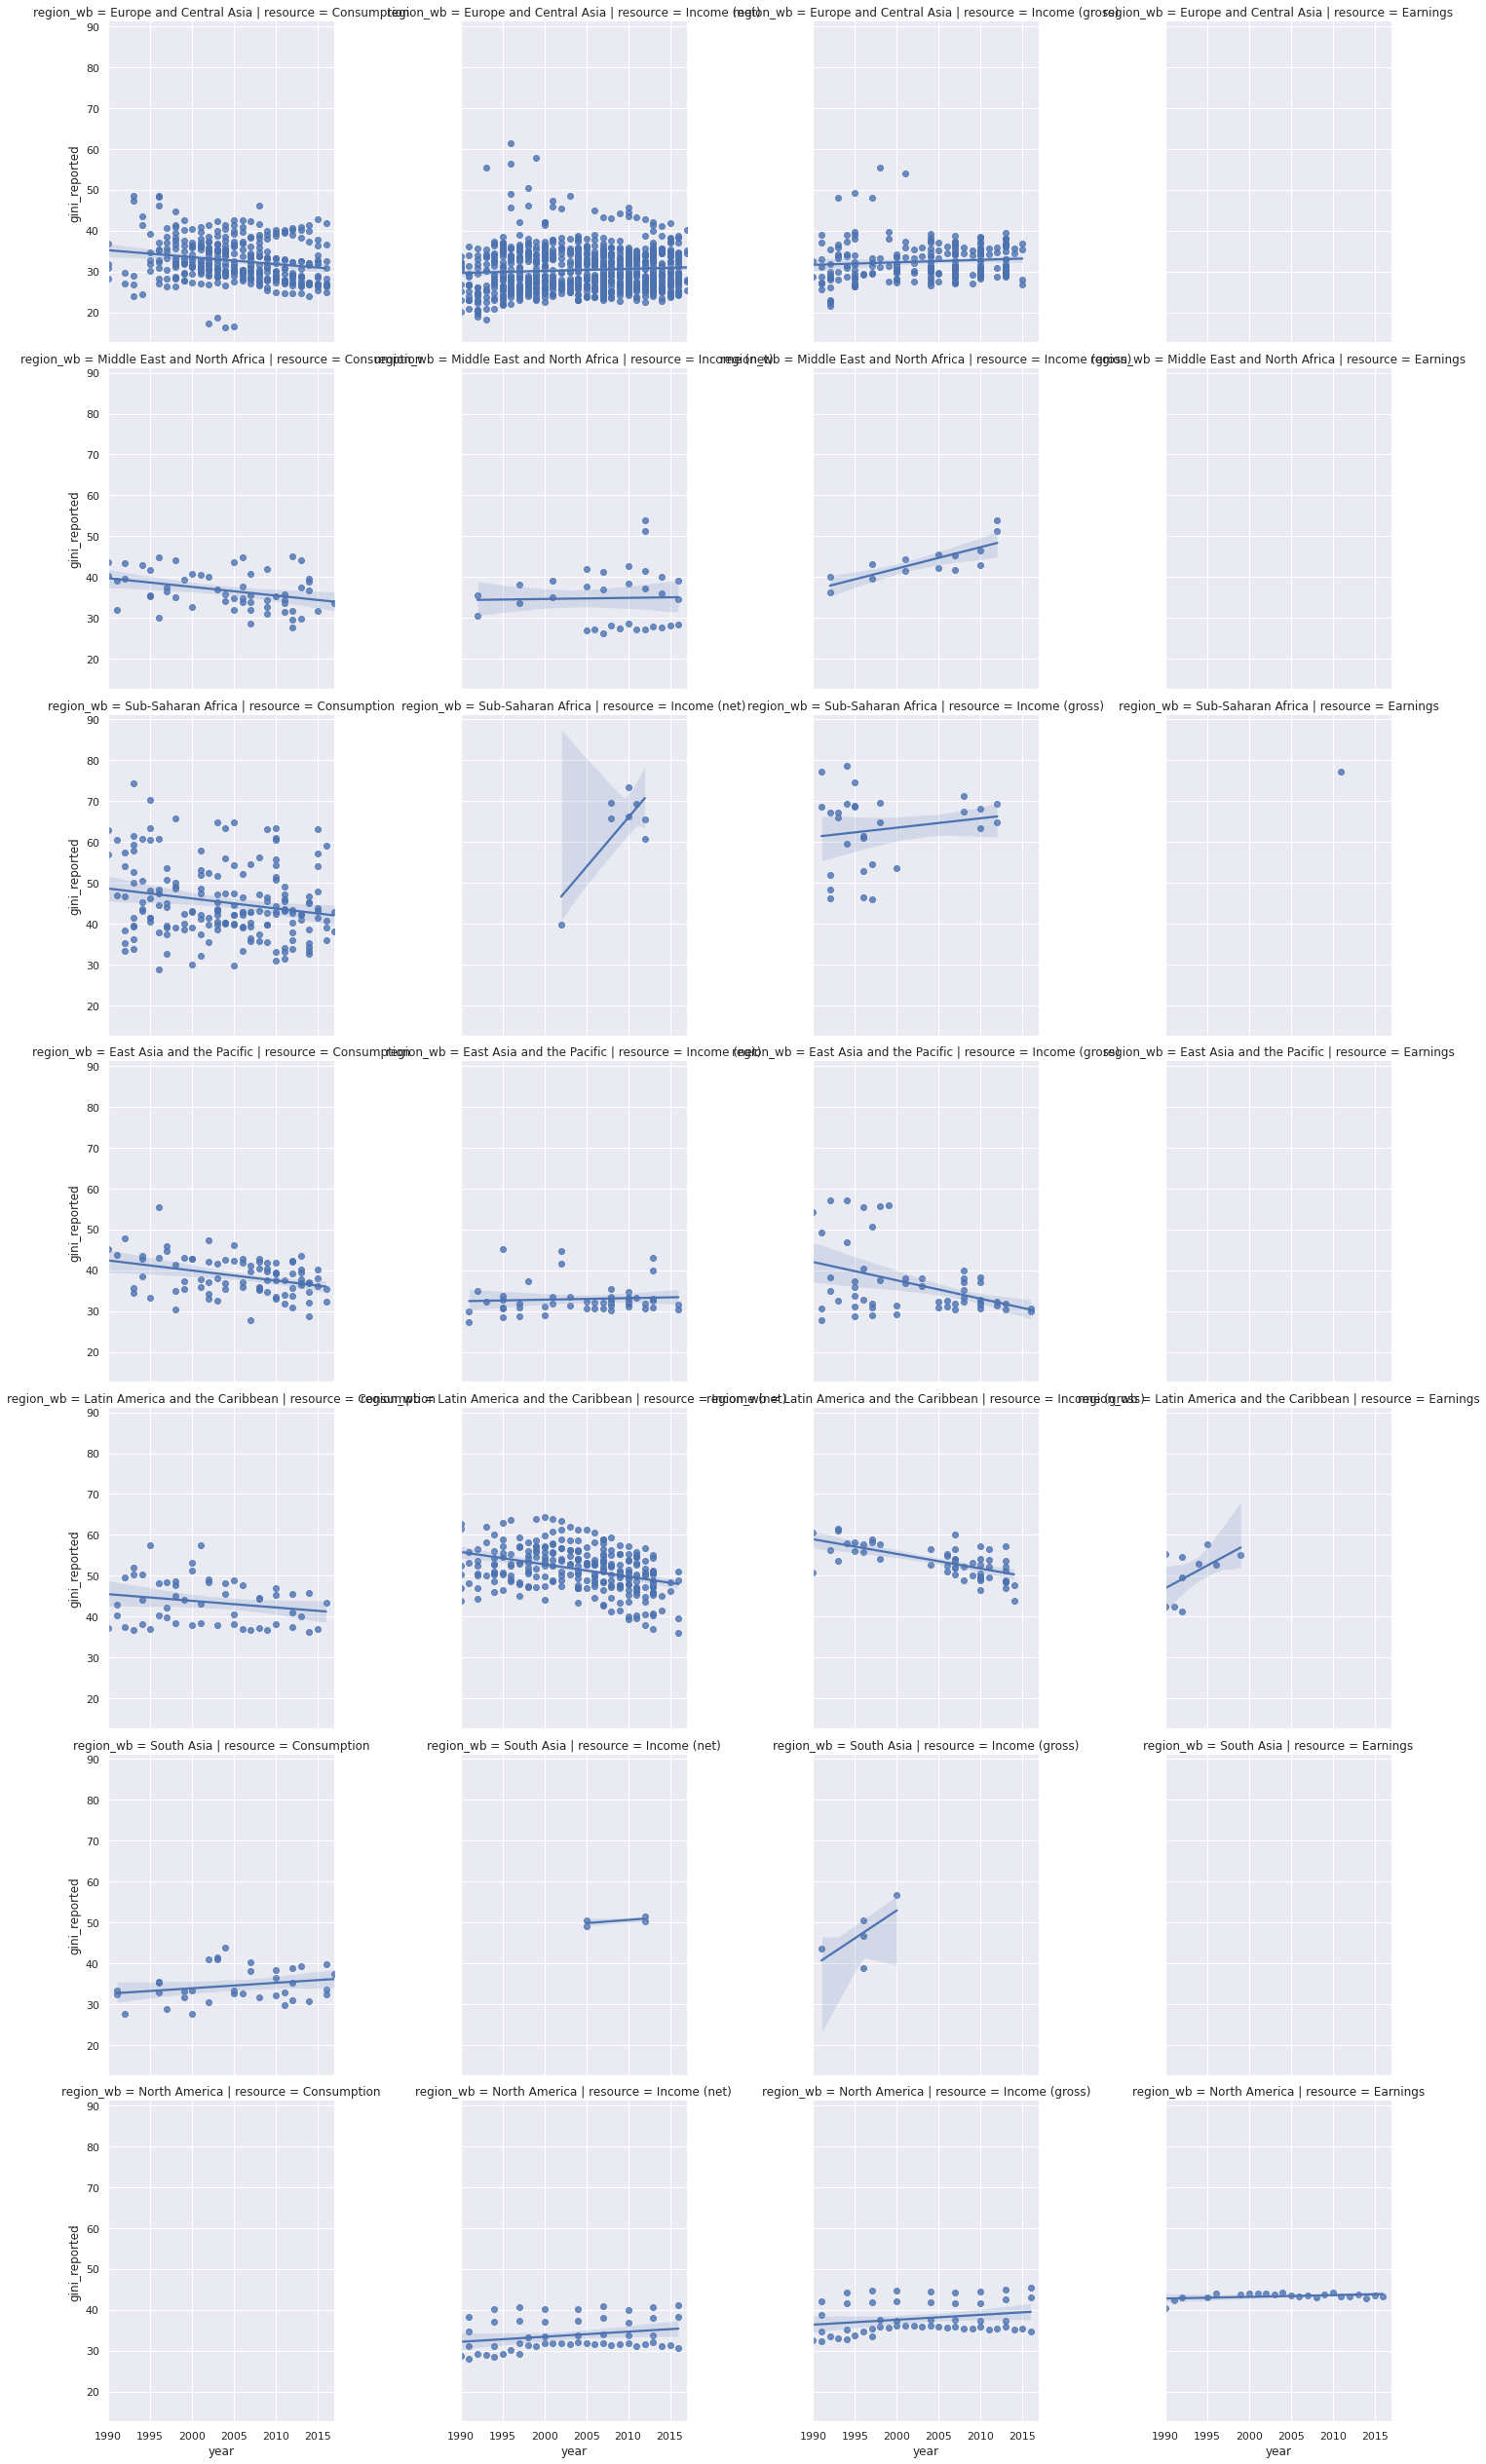

In [45]:
sns.lmplot(data=data, x="year", y="gini_reported", col='resource', row='region_wb')

# Linear Regression

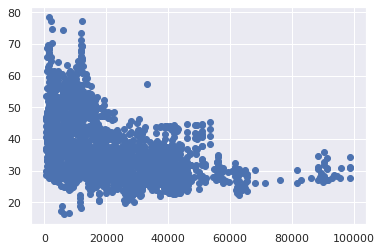

In [46]:
plt.scatter(x=data["gdp_ppp_pc_usd2011"], y=data["gini_reported"])

# gini_reported
# gdp_ppp_pc_usd2011
# net income
# gross income
# consumption


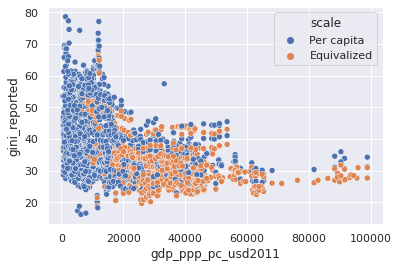

In [47]:
sns.scatterplot(x=data["gdp_ppp_pc_usd2011"], y=data["gini_reported"], hue=data['scale'])

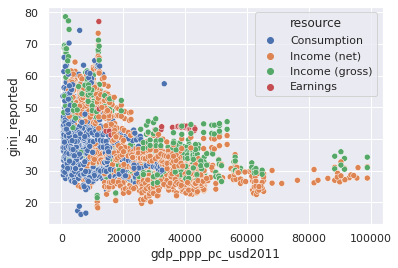

In [48]:
sns.scatterplot(x=data["gdp_ppp_pc_usd2011"], y=data["gini_reported"], hue=data['resource'])

In [49]:
#drop NaN to run the model fit
clean_data = data[['year','country','region_un','gini_reported','resource','scale','gdp_ppp_pc_usd2011']].dropna()

Y = clean_data[['gini_reported']]
X = clean_data[['gdp_ppp_pc_usd2011']]
X = sm.add_constant(X)
results = sm.OLS( Y, X ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          gini_reported   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     718.6
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          3.30e-139
Time:                        17:55:14   Log-Likelihood:                -8895.5
No. Observations:                2478   AIC:                         1.779e+04
Df Residuals:                    2476   BIC:                         1.781e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 43.0276      0.289    149.108      0.000      42.462      43.593
gdp_ppp_pc_usd2011    -0.0003   1.03e-05    -26.807      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      194.004   Durbin-Watson:                   0.463
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.198
Skew:                           0.717   Prob(JB):                     2.55e-53
Kurtosis:                       3.536   Cond. No.                     4.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

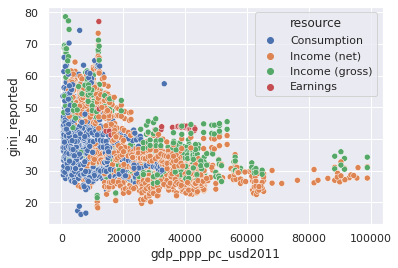

In [50]:
sns.scatterplot(x=clean_data["gdp_ppp_pc_usd2011"], y=clean_data["gini_reported"], hue=clean_data['resource'])

# *** THE END ***

#### Note(1): there is a scatter matrix plot at the end for North America and if required we could develop one at UN region level to show corelations

# 1. Oceania

(5, 3)


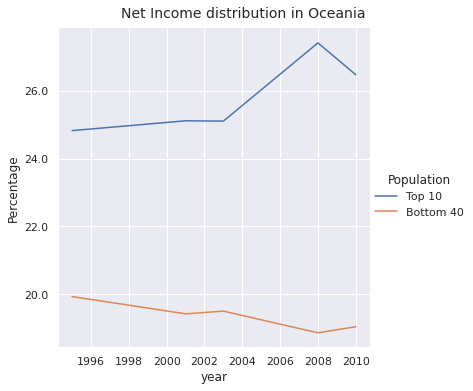

In [51]:
ni_grouped_oceania = ni_grouped[(ni_grouped['region_un']=='Oceania')][['year','Top 10','Bottom 40']]

print (ni_grouped_oceania.shape)
#fig, axes = plt.subplots(1,2,figsize=(20,10))
df = ni_grouped_oceania.melt('year', var_name='Population',  value_name='Percentage')
g = sns.relplot(x="year", y="Percentage", kind="line", hue="Population", data=df)
g.fig.suptitle('Net Income distribution in Oceania', y='1.03',fontsize='14')
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y:.1f}'))
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x:.0f}'))
    


(7, 3)


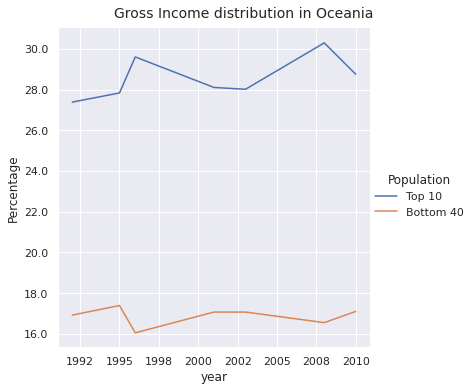

In [52]:
# plot the same for Gross income
gi_grouped_oceania = gi_grouped[(gi_grouped['region_un']=='Oceania')][['year','Top 10','Bottom 40']]
print(gi_grouped_oceania.shape)
#fig = plt.subplots(figsize=(20,10))
df = gi_grouped_oceania.melt('year', var_name='Population',  value_name='Percentage')
g = sns.relplot(x="year", y="Percentage", kind="line", hue="Population", data=df)
g.fig.suptitle('Gross Income distribution in Oceania', y='1.03',fontsize='14')

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y:.1f}'))
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x:.0f}'))

# 2. Europe

(27, 3)


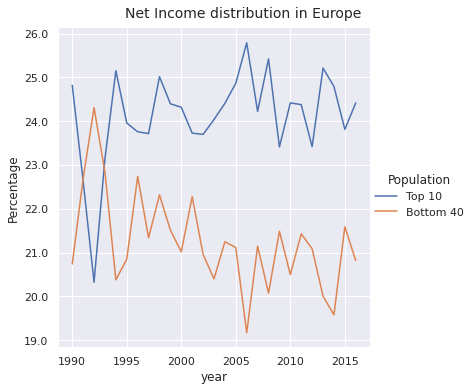

In [53]:
ni_grouped_europe = ni_grouped[(ni_grouped['region_un']=='Europe')][['year','Top 10','Bottom 40']]
print(ni_grouped_europe.shape)
df = ni_grouped_europe.melt('year', var_name='Population',  value_name='Percentage')
g = sns.relplot(x="year", y="Percentage", kind="line", hue="Population", data=df)
g.fig.suptitle('Net Income distribution in Europe', y='1.03',fontsize='14')
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y:.1f}'))
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x:.0f}'))
    

(26, 3)


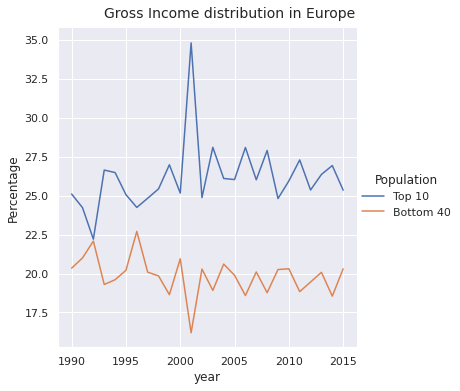

In [54]:
# plot the same for Gross income
gi_grouped_europe = gi_grouped[(gi_grouped['region_un']=='Europe')][['year','Top 10','Bottom 40']]
print(gi_grouped_europe.shape)
df = gi_grouped_europe.melt('year', var_name='Population',  value_name='Percentage')
g = sns.relplot(x="year", y="Percentage", kind="line", hue="Population", data=df)
g.fig.suptitle('Gross Income distribution in Europe', y='1.03',fontsize='14')

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y:.1f}'))
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x:.0f}'))

# 3. Asia

(23, 3)


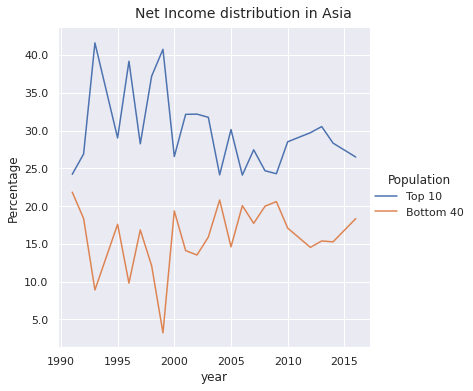

In [55]:
ni_grouped_asia = ni_grouped[(ni_grouped['region_un']=='Asia')][['year','Top 10','Bottom 40']]
print(ni_grouped_asia.shape)
df = ni_grouped_asia.melt('year', var_name='Population',  value_name='Percentage')
g = sns.relplot(x="year", y="Percentage", kind="line", hue="Population", data=df)
g.fig.suptitle('Net Income distribution in Asia', y='1.03',fontsize='14')
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y:.1f}'))
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x:.0f}'))

(23, 3)


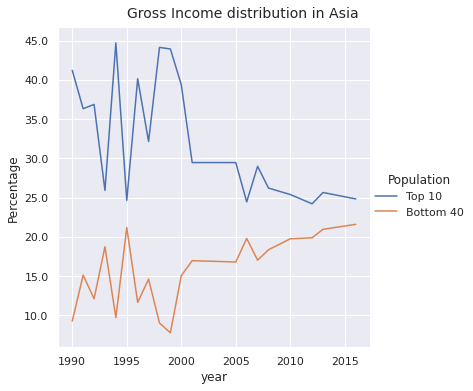

In [56]:
# plot the same for Gross income
gi_grouped_asia = gi_grouped[(gi_grouped['region_un']=='Asia')][['year','Top 10','Bottom 40']]
print(ni_grouped_asia.shape)
df = gi_grouped_asia.melt('year', var_name='Population',  value_name='Percentage')
g = sns.relplot(x="year", y="Percentage", kind="line", hue="Population", data=df)
g.fig.suptitle('Gross Income distribution in Asia', y='1.03',fontsize='14')

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y:.1f}'))
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x:.0f}'))

 # 4. Africa

(5, 3)


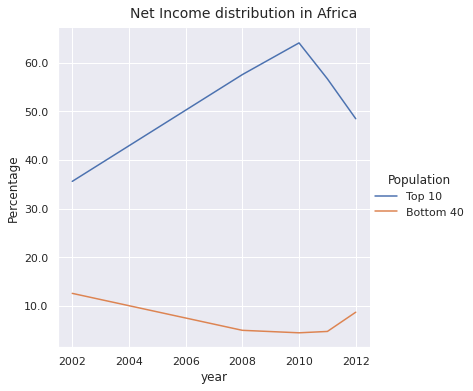

In [57]:
ni_grouped_africa = ni_grouped[(ni_grouped['region_un']=='Africa')][['year','Top 10','Bottom 40']]
print(ni_grouped_africa.shape)
df = ni_grouped_africa.melt('year', var_name='Population',  value_name='Percentage')
g = sns.relplot(x="year", y="Percentage", kind="line", hue="Population", data=df)
g.fig.suptitle('Net Income distribution in Africa', y='1.03',fontsize='14')
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y:.1f}'))
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x:.0f}'))

(12, 3)


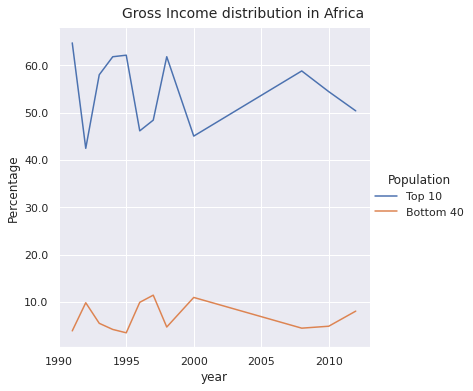

In [58]:
# plot the same for Gross income
gi_grouped_africa = gi_grouped[(gi_grouped['region_un']=='Africa')][['year','Top 10','Bottom 40']]
print(gi_grouped_africa.shape)
df = gi_grouped_africa.melt('year', var_name='Population',  value_name='Percentage')
g = sns.relplot(x="year", y="Percentage", kind="line", hue="Population", data=df)
g.fig.suptitle('Gross Income distribution in Africa', y='1.03',fontsize='14')

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y:.1f}'))
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x:.0f}'))

# 5. Americas

(27, 3)
    year  Top 10  Bottom 40
0   1990  42.160     11.540
2   1991  38.230     11.400
5   1992  42.650     11.470
8   1993  45.200      8.200
11  1994  41.450     10.940
13  1995  43.630     10.345
17  1996  42.030     11.140
20  1997  40.200     11.195
23  1998  42.230     10.310
26  1999  43.700      9.900
29  2000  43.095     10.405
32  2001  43.400      9.400
37  2002  42.800     10.200
40  2003  43.800      9.800
44  2004  39.800     11.200
47  2005  42.000     10.900
50  2006  40.720     11.110
53  2007  40.785     10.565
57  2008  39.400     11.080
61  2009  38.800     12.000
65  2010  37.990     12.120
70  2011  38.660     11.910
73  2012  38.400     11.690
76  2013  37.640     12.780
79  2014  36.760     15.230
82  2015  39.350     13.440
84  2016  30.460     15.520


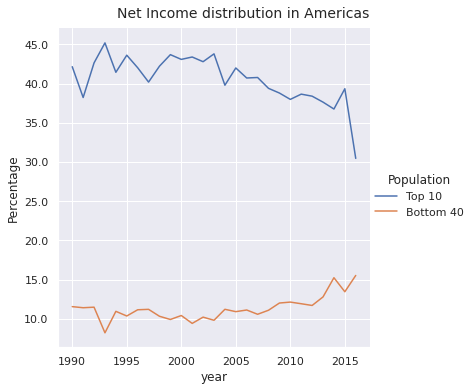

In [59]:
ni_grouped_americas = ni_grouped[(ni_grouped['region_un']=='Americas')][['year','Top 10','Bottom 40']]
print(ni_grouped_americas.shape)
print(ni_grouped_americas)
df = ni_grouped_americas.melt('year', var_name='Population',  value_name='Percentage')
g = sns.relplot(x="year", y="Percentage", kind="line", hue="Population", data=df)
g.fig.suptitle('Net Income distribution in Americas', y='1.03',fontsize='14')
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y:.1f}'))
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x:.0f}'))

(20, 3)


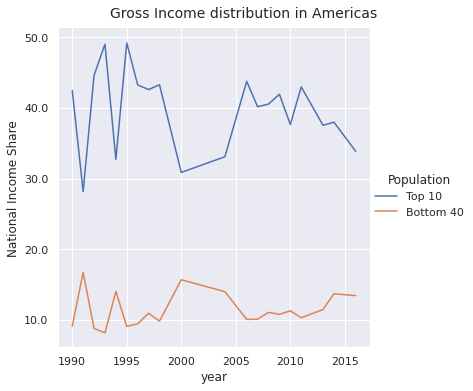

In [60]:
# plot the same for Gross income
gi_grouped_americas = gi_grouped[(gi_grouped['region_un']=='Americas')][['year','Top 10','Bottom 40']]
print(gi_grouped_americas.shape)
df = gi_grouped_americas.melt('year', var_name='Population',  value_name='National Income Share')
g = sns.relplot(x="year", y="National Income Share", kind="line", hue="Population", data=df)
g.fig.suptitle('Gross Income distribution in Americas', y='1.03',fontsize='14')

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y:.1f}'))
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x:.0f}'))

# Sub Regions

In [61]:
# Review the data availability per region_un
pd.crosstab (filtered_netIncome['year'],filtered_netIncome['region_un_sub'])

region_un_sub,Australia and New Zealand,Caribbean,Central America,Central Asia,Eastern Africa,Eastern Asia,Eastern Europe,Northern Africa,Northern America,Northern Europe,South America,Southern Africa,Southern Asia,Southern Europe,Western Asia,Western Europe
year,,,,,,,,,,,,,,,,
1990,0,0,2,0,0,0,0,0,0,1,3,0,0,2,0,1
1991,0,0,1,0,0,1,2,0,2,3,2,0,0,1,0,2
1992,0,0,3,0,0,0,4,0,0,3,2,0,0,0,1,3
1993,0,0,1,1,0,0,5,0,0,1,2,0,0,2,0,2
1994,0,0,4,0,0,0,3,0,2,3,4,0,0,2,0,4
1995,1,1,2,0,0,2,5,0,0,8,5,0,0,5,0,3
1996,0,0,2,2,0,0,6,0,0,2,3,0,0,2,1,1
1997,0,0,4,1,0,1,7,0,2,3,4,0,0,3,1,4
1998,0,1,5,1,0,0,5,0,1,3,2,0,0,4,1,1


In [62]:
pd.crosstab (filtered_grossIncome['year'],filtered_grossIncome['region_un_sub'])

region_un_sub,Australia and New Zealand,Caribbean,Central America,Central Asia,Eastern Africa,Eastern Asia,Eastern Europe,Middle Africa,Northern Africa,Northern America,Northern Europe,South America,South-eastern Asia,Southern Africa,Southern Asia,Southern Europe,Western Africa,Western Asia,Western Europe
year,,,,,,,,,,,,,,,,,,,
1990,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
1991,0,0,0,0,1,1,0,0,0,2,3,0,1,0,1,0,1,0,1
1992,1,1,0,0,1,0,2,0,0,0,2,0,1,0,0,0,3,1,2
1993,0,1,0,2,1,0,4,0,0,0,0,2,0,0,0,0,1,0,1
1994,0,0,0,0,1,0,1,0,0,2,1,1,2,0,0,0,2,0,2
1995,1,1,0,0,1,1,3,0,0,0,5,1,0,1,0,0,1,0,1
1996,1,0,0,0,2,0,1,1,0,0,0,2,1,0,3,0,1,0,0
1997,0,1,0,0,1,1,3,0,0,2,0,1,1,1,0,0,0,1,1
1998,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,1,1


In [63]:
ni_grouped_sub = filtered_netIncome[['year','gini_reported','region_un_sub','Top 10','Bottom 40','gdp_ppp_pc_usd2011']].groupby(['year','region_un_sub']).median().reset_index()
ni_grouped_sub

,year,region_un_sub,gini_reported,Top 10,Bottom 40,gdp_ppp_pc_usd2011
0,1990,Central America,52.65,40.900,10.800,5479.5
1,1990,Northern Europe,22.90,19.670,25.680,28849.0
2,1990,South America,52.40,42.160,11.540,10345.0
3,1990,Southern Europe,32.10,25.580,20.205,21860.5
4,1990,Western Europe,31.20,24.550,21.240,32060.0
...,...,...,...,...,...,...
208,2016,Eastern Asia,31.50,25.170,21.000,NaN
209,2016,Eastern Europe,31.30,24.420,20.820,25863.0
210,2016,Northern America,41.10,30.460,15.520,53603.0
211,2016,South America,45.30,34.655,14.015,14482.5


In [64]:
gi_grouped_sub = filtered_grossIncome[['year','gini_reported','region_un_sub','Top 10','Bottom 40','gdp_ppp_pc_usd2011']].groupby(['year','region_un_sub']).median().reset_index()
gi_grouped_sub

,year,region_un_sub,gini_reported,Top 10,Bottom 40,gdp_ppp_pc_usd2011
0,1990,Caribbean,50.9,37.06,10.61,7286.0
1,1990,South America,60.6,47.93,7.65,10345.0
2,1990,South-eastern Asia,54.3,41.23,9.27,6650.0
3,1990,Western Europe,32.6,25.11,20.35,32060.0
4,1991,Eastern Africa,77.3,70.24,3.12,2281.0
...,...,...,...,...,...,...
148,2014,Western Europe,35.6,26.94,18.55,43290.0
149,2015,Eastern Europe,28.1,22.75,22.53,25186.0
150,2015,Western Europe,36.7,27.97,18.08,43927.0
151,2016,Eastern Asia,30.6,24.84,21.60,NaN


# 5.1. Northern America

(10, 5)
     year  Top 10  Bottom 40  gini_reported  gdp_ppp_pc_usd2011
8    1991  25.630     18.640          34.60             33307.0
28   1994  26.680     18.270          35.65             35344.5
54   1997  27.150     18.085          36.15             37706.0
64   1998  25.390     19.610          33.30             34504.0
81   2000  27.970     17.840          36.85             41744.0
119  2004  27.890     17.660          37.00             44151.5
143  2007  28.280     17.565          37.40             46300.0
168  2010  27.550     17.680          36.85             44995.5
195  2013  27.615     17.345          37.25             46666.0
210  2016  30.460     15.520          41.10             53603.0


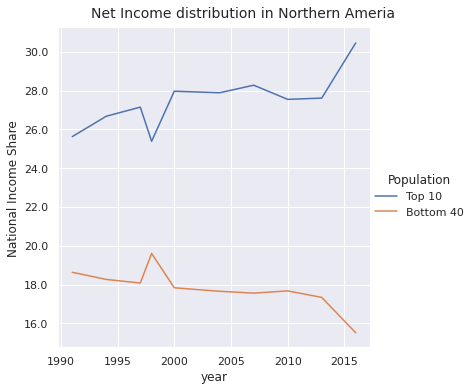

In [65]:
ni_grouped_northamerica = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Northern America')][['year','Top 10','Bottom 40','gini_reported','gdp_ppp_pc_usd2011']]
print(ni_grouped_northamerica.shape)
print(ni_grouped_northamerica)
df = ni_grouped_northamerica[['year','Top 10','Bottom 40']].melt('year', var_name='Population',  value_name='National Income Share')
g = sns.relplot(x="year", y="National Income Share", kind="line", hue="Population", data=df)
g.fig.suptitle('Net Income distribution in Northern Ameria', y='1.03',fontsize='14')
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y:.1f}'))
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x:.0f}'))
    

In [66]:
ni_grouped_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                213 non-null    int64  
 1   region_un_sub       213 non-null    object 
 2   gini_reported       211 non-null    float64
 3   Top 10              213 non-null    float64
 4   Bottom 40           213 non-null    float64
 5   gdp_ppp_pc_usd2011  206 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.1+ KB


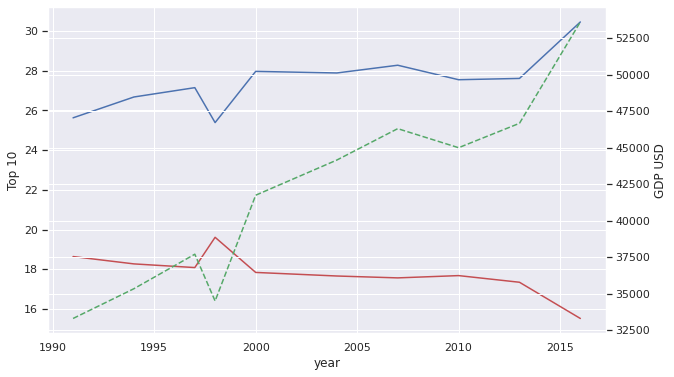

In [76]:
ni_grouped_northamerica = ni_grouped_sub[(ni_grouped_sub['region_un_sub']=='Northern America')][['year','Top 10','Bottom 40','gini_reported','gdp_ppp_pc_usd2011']]
ni_grouped_northamerica.rename(columns={'gini_reported':'Gini Index','gdp_ppp_pc_usd2011' : 'GDP USD' }, inplace='True')
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
ax2.ylabel='Gini Index'

sns.lineplot(x='year',y='Top 10', data=ni_grouped_northamerica, ax=ax1)
sns.lineplot(x='year',y='Bottom 40', data=ni_grouped_northamerica, ax=ax1, color='r')
sns.lineplot(x='year',y='GDP USD', data=ni_grouped_northamerica, ax=ax2, color='g', linestyle='dashed')




### North America Sub Region: Scatter Matrix

In [78]:
ni_NA_SP_data = ni_grouped_northamerica[['Top 10','Bottom 40','Gini Index','GDP USD']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94f61f9b90>,
      dtype=object)

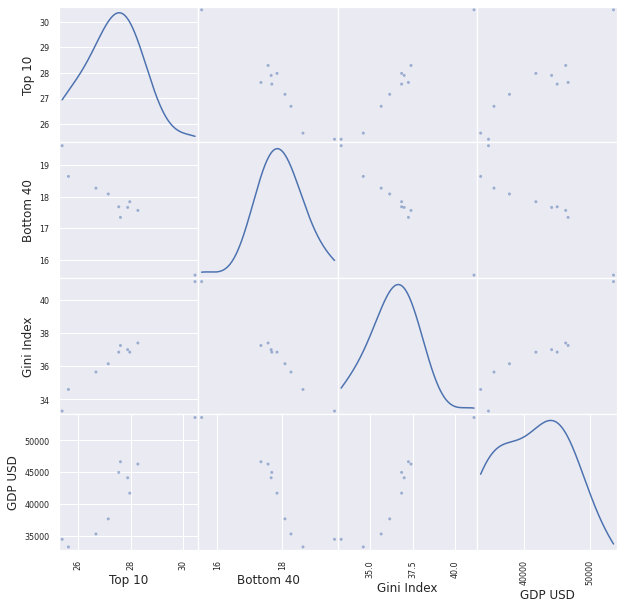

In [79]:
pd.plotting.scatter_matrix(ni_NA_SP_data, alpha= 0.5, grid=True, figsize=(10,10),diagonal='kde')

(10, 3)
     year  Top 10  Bottom 40
6    1991  28.170     16.740
30   1994  29.365     16.265
58   1997  29.850     16.065
66   1998  28.210     17.390
77   2000  30.885     15.695
90   2004  30.560     15.635
106  2007  30.720     15.715
124  2010  30.420     15.650
142  2013  30.290     15.425
152  2016  33.870     13.450


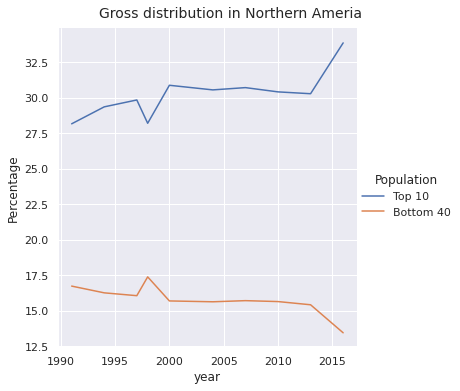

In [80]:
gi_grouped_northamerica = gi_grouped_sub[(gi_grouped_sub['region_un_sub']=='Northern America')][['year','Top 10','Bottom 40']]
print(gi_grouped_northamerica.shape)
print(gi_grouped_northamerica)
df = gi_grouped_northamerica.melt('year', var_name='Population',  value_name='Percentage')
g = sns.relplot(x="year", y="Percentage", kind="line", hue="Population", data=df)
g.fig.suptitle('Gross distribution in Northern Ameria', y='1.03',fontsize='14')
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y:.1f}'))
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x:.0f}'))